<div class="alert alert-block alert-info">

[1. The needed steps](#1st-bullet)<br>
- [1.1 Import the needed libraries](#2nd-bullet)<br>
- [1.2 Import the dataset](#3rd-bullet)<br>
- [1.3. Data pre-processing, data partition and scaling](#4th-bullet)<br>
    
[2. Feature Selection](#5th-bullet)<br>
- [2.1 Filter methods](#6th-bullet)<br>
    - [2.1.1 Univariate variables](#7th-bullet)<br>
    - [2.1.2 Correlation Indices](#8th-bullet)<br>
    - [2.1.3 Chi-Square](#9th-bullet)<br>
- [2.2 Wrapper Methods](#10th-bullet)<br>
    - [2.2.1 RFE](#11th-bullet)<br>
- [2.3 Embedded Methods](#12th-bullet)<br>
    - [2.3.1 Lasso](#13th-bullet)<br>
- [2.4 Final Insights](#14th-bullet)<br>
    
</div>

<div class="alert alert-block alert-info">
 
### Instructions according to the handout description
 
1. Import the dataset and explore the data (3 points)
- 1.1 Check data contents and provide descriptive statistics
- 1.2 Check for incoherencies in the data.
- 1.3 Explore data visually and extract relevant insights. Explain your rationale and
findings. Do not forget to analyse multivariate relationships.
2. Clean and pre-process the dataset (5 points)
- 2.1 Are there any missing values? Take action to handle them.
- 2.2 Check the dataset for outliers and pre-process them. Justify your decisions.
- 2.3 Deal with categorical variables.
- 2.4 Review current features and create extra features if needed. Explain your steps.
- 2.5 Perform data scaling. Explain the reasoning behind your choices.
3. Feature selection (3 points)
- 3.1 Define and implement an unambiguous strategy for feature selection. Use methods
discussed in the course. Present and justify your final selection.
4. Build a simple model and assess the performance (4 points)
- Identify the type of the problem and select the relevant algorithms.
- Use cross-validation to assess performance. Which metrics did you use and why?
- Train at least 1 model using the train dataset and obtain predictions for the test
dataset.

## Import 

### Import Libraries

In [17]:
## Import standard data processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import datetime object for date columns in dataset
from datetime import datetime

## Setting seaborn style
sns.set()

from math import ceil

## Import train_test_split to split data for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None) #Show all columns


## Supress warnings
import warnings
warnings.filterwarnings('ignore')


## Created functions

---

### Import Datasets

In [18]:
# train_data = pd.read_csv("train_data.csv", low_memory=False)
# test_data = pd.read_csv("test_data.csv")



---

## 1. Data exploration

### 1.1  Data content and descriptive analysis

In [19]:
train_data.head()


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [20]:
test_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


In [21]:
train_data.shape

(593471, 33)

In [22]:
test_data.shape

(387975, 30)

Train data has 3 more variables than test data. Below we check which columns containt train that test does not have.

In [23]:
test_data.columns.values

array(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date',
       'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code',
       'Number of Dependents'], dtype=object)

In [24]:
train_data.columns.values

array(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'Claim Identifier', 'Claim Injury Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'], dtype=object)

In the Train there is not variables: Claim Injury Type (reasonable becuase it is target variable), Agreement Reached and WCB Decision. Maybe it is the information that is known after defininig the target variable

In [25]:
# set "Claim Identifier" as the index for the train and test datasets
train_data = train_data.set_index("Claim Identifier")
test_data = test_data.set_index("Claim Identifier")

In [26]:
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574026.0,NaN,NaN,NaN,42.11427,14.256432,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574026,3,N,571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,593471,1096,2020-03-06,1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574026,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545375.0,NaN,NaN,NaN,491.088321,6092.91812,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,NaN,NaN,NaN,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187245,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574026,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

### 1.2 Checking incoherencies in the data.

In [27]:
train_data.info()

## DATA TYPES:
# Convert accident date (to date type)
# convert age (to int)
# Alternative dispute resolution (??)
# Assembly date (to date type)
# birth year (to int)
# C2 date (to date type)
# C3 date (to date type)
# First hearing date (to date)
# IME-4 count (to int)
# Industry code (object)
# OIICS Nature of Injury Description (to object) - all nulls (relevant??)
# WCIO cause of injury code (float to object)
# WCIO Nature of Injury Code (float to object)
# WCIO Part Of Body Code (float to object)
# Agreement reached (??) - boolean/ int(???)
# Number of dependents (to int)

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  County of Injury        

#### - Changing the data types


In [29]:
train_data["Age at Injury"] = train_data["Age at Injury"].astype("Int64")
test_data["Age at Injury"] = test_data["Age at Injury"].astype("Int64")

train_data["Number of Dependents"] = train_data["Number of Dependents"].astype("Int64")
test_data["Number of Dependents"] = test_data["Number of Dependents"].astype("Int64")

train_data["Birth Year"] = train_data["Birth Year"].astype("Int64")
test_data["Birth Year"] = test_data["Birth Year"].astype("Int64")

train_data["WCIO Part Of Body Code"] = train_data["WCIO Part Of Body Code"].astype("Int64")
test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].astype("Int64")

train_data["WCIO Nature of Injury Code"] = train_data["WCIO Nature of Injury Code"].astype("Int64")
test_data["WCIO Nature of Injury Code"] = test_data["WCIO Nature of Injury Code"].astype("Int64")

train_data["WCIO Cause of Injury Code"] = train_data["WCIO Cause of Injury Code"].astype("Int64")
test_data["WCIO Cause of Injury Code"] = test_data["WCIO Cause of Injury Code"].astype("Int64")

train_data["Industry Code"] = train_data["Industry Code"].astype("Int64")
test_data["Industry Code"] = test_data["Industry Code"].astype("Int64")

train_data["Agreement Reached"] = train_data["Agreement Reached"].astype("Int64")

train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date'])
test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date'])

train_data["Assembly Date"] = pd.to_datetime(train_data['Assembly Date'])
test_data["Assembly Date"] = pd.to_datetime(test_data['Assembly Date'])

train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date'])
test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date'])

train_data["C-3 Date"] = pd.to_datetime(train_data['C-3 Date'])
test_data["C-3 Date"] = pd.to_datetime(test_data['C-3 Date'])

train_data["First Hearing Date"] = pd.to_datetime(train_data['First Hearing Date'])
test_data["First Hearing Date"] = pd.to_datetime(test_data['First Hearing Date'])




#train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date']).dt.strftime('%Y-%m-%d')
#test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date']).dt.strftime('%Y-%m-%d')

#train_data["Assembly Date"] = pd.to_datetime(train_data['Assembly Date']).dt.strftime('%Y-%m-%d')
#test_data["Assembly Date"] = pd.to_datetime(test_data['Assembly Date']).dt.strftime('%Y-%m-%d')

#train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date']).dt.strftime('%Y-%m-%d')
#test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date']).dt.strftime('%Y-%m-%d')

#train_data["C-3 Date"] = pd.to_datetime(train_data['C-3 Date']).dt.strftime('%Y-%m-%d')
#test_data["C-3 Date"] = pd.to_datetime(test_data['C-3 Date']).dt.strftime('%Y-%m-%d')

#train_data["First Hearing Date"] = pd.to_datetime(train_data['First Hearing Date']).dt.strftime('%Y-%m-%d')
#test_data["First Hearing Date"] = pd.to_datetime(test_data['First Hearing Date']).dt.strftime('%Y-%m-%d')


#### - Checking the duplicates

In [30]:
duplicates_sum_train = train_data.duplicated().sum()
duplicates_sum_test = test_data.duplicated().sum()

print(f"There are {duplicates_sum_train} in the training dataset.")
print(f"There are {duplicates_sum_test} in the test dataset.")

There are 18350 in the training dataset.
There are 2 in the test dataset.


We do not drop duplicates in the test dataset. We only do that in the train dataset.

In [31]:
train_data.drop_duplicates(inplace=True)

#### - Checking unique values in each of the variable and looking for some values that can indicate missing values

In [32]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    unique_values_num = train_data[column].nunique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print(f"Number of unique values in '{column}':")
    print(unique_values_num)
    
    print()

Unique values in 'Accident Date':
<DatetimeArray>
['2019-12-30 00:00:00', '2019-08-30 00:00:00', '2019-12-06 00:00:00',
                 'NaT', '2019-12-26 00:00:00', '2019-12-28 00:00:00',
 '2019-12-23 00:00:00', '2019-12-29 00:00:00', '2019-12-14 00:00:00',
 '2019-08-26 00:00:00',
 ...
 '2000-11-04 00:00:00', '2022-12-26 00:00:00', '2022-12-30 00:00:00',
 '2010-08-26 00:00:00', '1985-08-13 00:00:00', '2000-06-21 00:00:00',
 '2008-03-01 00:00:00', '2000-05-24 00:00:00', '2007-05-01 00:00:00',
 '1980-05-17 00:00:00']
Length: 5540, dtype: datetime64[ns]
Number of unique values in 'Accident Date':
5539

Unique values in 'Age at Injury':
<IntegerArray>
[  31,   46,   40, <NA>,   61,   67,   48,   33,   55,   20,
 ...
  101,    7,  111,    9,   97,  112,  109,  100,   98,  114]
Length: 109, dtype: Int64
Number of unique values in 'Age at Injury':
108

Unique values in 'Alternative Dispute Resolution':
['N' nan 'Y' 'U']
Number of unique values in 'Alternative Dispute Resolution':
3

Unique 

Cells below are commented because they were used to check more detailed unique values for chosen variables

In [33]:
# train_data['Accident Date'].value_counts().sort_index(ascending=False)

In [34]:
# train_data['Age at Injury'].value_counts().sort_index(ascending=False)

In [35]:
# train_data['Assembly Date'].value_counts().sort_index(ascending=False)

In [36]:
# train_data['Average Weekly Wage'].value_counts().sort_index(ascending=False)

In [37]:
# train_data['Birth Year'].value_counts().sort_index(ascending=False)

In [38]:
# train_data['C-2 Date'].value_counts().sort_index(ascending=False)

In [39]:
# train_data['C-3 Date'].value_counts().sort_index(ascending=False)

In [40]:
# train_data['Carrier Name'].value_counts().sort_index()

In the variable Carrier Type there is one category 5A, 5C and 5D that can be change to one 5 that will be Special Fund

In [41]:
# train_data['Carrier Type'].value_counts().sort_index()

In [42]:
# train_data['First Hearing Date'].value_counts().sort_index()

In [43]:
# train_data['Zip Code'].value_counts().sort_index()

#### All listed Variables - unique variables summary 

1. **Accident Date**: contains dates, no strange values (5539 unique values)

2. **Age at Injury**: there are some values >100 and there is age equal to  0  (108 unique values) 
3. **Alternative Dispute Resolution**: there is one strange unique value such as "U" (3 unique values)
4. **Assembly Date**: containts dates, no strange values (1096 unique values)
5. **Attorney/Representative**: no strange values (2 unique values)
6. **Average Weekly Wage**: no typical strange values but there are many records sayin that avg weekly wage is equal to 0, a lot of unique values (120024 unique values)
7. **Birth Year**:  one strange values "0" (Birth Year cannot be 0) (107 unique values)
8. **C-2 Date**: contains data, there are some years from 90s (2475 unique values)
9. **C-3 Date**: contains data, there are some years from 90s (1648 unique values)
10. **Carrier Name**: there are some strange description such as: '*** CARRIER UNDETERMINED ***', (2046 unique values) 
11. **Carrier Type**: there is one strange value 'UNKNOWN' (8 unique values)
12. **Claim Injury Type**: no strange values (8 unique values)
13. **County of Injury**: there is one strange value 'UNKNOWN' (63 unique values)
14. **COVID-19 Indicator**: no strange values (2 unique values)
15. **District Name**: no strange values (8 unique values)
16. **First Hearing Date**: no strange values (1094 unique values)
17. **Gender**: two strange values 'U' 'X' (4 unique values)
18. **Industry Code**: no strange values (24 unique values)
19. **Industry Code Description**: no strange values (20 unique values)
20. **Medical Fee Region**: one strange value 'UK' (4 unique values)
21. ***OIICS Nature of Injury Description**: variable does not contain any data
22. **WCIO Cause of Injury Code**: no strange values (77 unique values) 
23. **WCIO Cause of Injury Description**: no strange values (74 unique values)
24. **WCIO Nature of Injury Code**: and no strange values (56 unique values)
25. **WCIO Nature of Injury Description**: no strange values (56 unique values)
26. **WCIO Part Of Body Code**: one strange values "-9" (57 unique values)
27. **WCIO Part Of Body Description**: no strange values (54 unique values)
28. **Zip Code**:  this variables is a bit strange, it has some strange zip codes such as zip code '.1605', '00000' or '99999' that does not exist, also it has zip codes that starts with letters not with numbers as well as one unique value 'UNKNO' (8286 unique values)
29. **Agreement Reached**:  no strange values (2 unique values)
30. **WCB Decision**: no strange values (1 unique value)
31. **Number of Dependents**: no strange values (7 unique values)


Based on the description above we changed strange values to missing values.

In [44]:
# Filling missing values with NaN

train_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)
test_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)

train_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)
test_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)

train_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)
test_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)

train_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)
test_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)

train_data['Gender'].replace(['X','U'], np.nan, inplace = True)
test_data['Gender'].replace(['X','U'], np.nan, inplace = True)

train_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)
test_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)

train_data['Zip Code'].replace([".1605", "00000", "99999","UNKNO"], np.nan, inplace=True)
test_data['Zip Code'].replace([".1605", "00000", "99999", "UNKNO"], np.nan, inplace=True)

Investigating 0 values in the Age variable

In [45]:
train_data[train_data['Age at Injury'] == 0].shape

(5463, 32)

In [46]:
age_at_injury_zero = train_data[train_data['Age at Injury'] == 0]
age_at_injury_zero.groupby('Birth Year')['Age at Injury'].value_counts(dropna=False).sort_index()

Birth Year  Age at Injury
0           0                1926
1900        0                   2
1901        0                  28
1902        0                  28
1903        0                  35
1936        0                   1
1937        0                   1
1941        0                   1
1942        0                   1
1943        0                   2
1944        0                   2
1945        0                   5
1946        0                   1
1947        0                   5
1948        0                   6
1949        0                   3
1950        0                  16
1951        0                  25
1952        0                  28
1953        0                  46
1954        0                  51
1955        0                  75
1956        0                  89
1957        0                  91
1958        0                 124
1959        0                 142
1960        0                 154
1961        0                 161
1962        0         

- There are 5463 zeros in total in the variables Age at Injury
- There are 1926 values that are 0 both in Birth Year as well as at Age at Injury
- The rest of the zero values (3537) in the variable Age at Injury can be replaced with actual age calulated as accident date - birth year 

Replacing the Age at Injury values that are equal to 0 (where Birth Year is not equal to 0) with the actual age calculated from the difference between the Accident Date and the Birth Year

In [47]:
train_data['Actual Age'] = train_data['Accident Date'].dt.year - train_data['Birth Year']

filtered_rows = train_data[(train_data['Birth Year'] != 0) & (train_data['Age at Injury'] == 0)]

train_data.loc[filtered_rows.index, 'Age at Injury'] = train_data['Actual Age']

In [48]:
test_data['Actual Age'] = test_data['Accident Date'].dt.year - test_data['Birth Year']

filtered_rows = test_data[(test_data['Birth Year'] != 0) & (test_data['Age at Injury'] == 0)]

test_data.loc[filtered_rows.index, 'Age at Injury'] = test_data['Actual Age']

Check if there are any incoherencies in between Age at Injury that is given in the data set and Actual Age calulated as difference between Accident Date and Birth Year

In [49]:
train_data['Age Diff'] = train_data['Actual Age'] - train_data['Age at Injury']

age_difference = train_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


Age Diff
 1.0    242970
-1.0       294
Name: count, dtype: Int64

In [50]:
test_data['Age Diff'] = test_data['Actual Age'] - test_data['Age at Injury']

age_difference = test_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


Age Diff
 1.0    185979
-1.0       158
Name: count, dtype: Int64

Conclusion:

There are no incoherencies in between those two variables. the only unique values are 1 and -1 and that difference can be caused by the fact that we dont have the Birth Month, so Actual Age can be slightly inaccurate.

In [51]:
train_data.drop(columns=['Actual Age','Age Diff'], inplace=True)
test_data.drop(columns=['Actual Age', 'Age Diff'], inplace=True)

In [52]:
train_data['Age at Injury'].value_counts().sort_index()

Age at Injury
0       2186
1          2
5          1
7          2
8          6
9          4
10         5
11         9
12         9
13         9
14        47
15       126
16       579
17      1322
18      3575
19      5960
20      7420
21      8356
22      9495
23     10649
24     10835
25     11550
26     12213
27     12679
28     13033
29     13657
30     14022
31     14041
32     13994
33     13480
34     13218
35     12885
36     12657
37     12913
38     12312
39     12190
40     11922
41     12108
42     11909
43     11511
44     11223
45     11270
46     11332
47     11539
48     11691
49     12453
50     12997
51     13486
52     13065
53     13274
54     13403
55     13305
56     12932
57     12744
58     12406
59     11571
60     11097
61     10437
62      8802
63      7487
64      6396
65      5116
66      3876
67      3070
68      2393
69      1970
70      1620
71      1266
72      1038
73       874
74       759
75       558
76       462
77       362
78       314
79       26

In [53]:
train_data[(train_data['Age at Injury'] == 0)].shape

(2186, 32)

In [54]:
# train_data.groupby('Age at Injury')['Birth Year'].value_counts(dropna=False).sort_index()

Changing Age at Injury from 0 to missing values where the Birth Year has missing value.

In [55]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'].isna()), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'].isna()), 'Age at Injury'] = np.nan


Changing Age at Injury from 0 to missing values where the Birth Year is also 0

In [56]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'] == 0), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'] == 0), 'Age at Injury'] = np.nan

In [57]:
train_data['Age at Injury'].value_counts(dropna=False).sort_index()

Age at Injury
1           2
5           1
7           2
8           6
9           4
10          5
11          9
12          9
13          9
14         47
15        126
16        579
17       1322
18       3575
19       5960
20       7420
21       8356
22       9495
23      10649
24      10835
25      11550
26      12213
27      12679
28      13033
29      13657
30      14022
31      14041
32      13994
33      13480
34      13218
35      12885
36      12657
37      12913
38      12312
39      12190
40      11922
41      12108
42      11909
43      11511
44      11223
45      11270
46      11332
47      11539
48      11691
49      12453
50      12997
51      13486
52      13065
53      13274
54      13403
55      13305
56      12932
57      12744
58      12406
59      11571
60      11097
61      10437
62       8802
63       7487
64       6396
65       5116
66       3876
67       3070
68       2393
69       1970
70       1620
71       1266
72       1038
73        874
74        759
75    

At this point Birth Year variable can be dropped since it has similar info as Age at Injury 

In [58]:
train_data = train_data.drop('Birth Year', axis=1)
test_data = test_data.drop('Birth Year', axis=1)

Recheck for unique values in those variables that have been changed

In [59]:
# train_data['Alternative Dispute Resolution'].value_counts().sort_index()

In [60]:
# train_data['Carrier Name'].value_counts().sort_index()

In [61]:
# train_data['Carrier Type'].value_counts().sort_index()

In [62]:
# train_data['County of Injury'].value_counts().sort_index()

In [63]:
# train_data['Gender'].value_counts().sort_index()

In [64]:
# train_data['Medical Fee Region'].value_counts().sort_index()

In [65]:
# train_data['Zip Code'].value_counts().sort_index()

There is also strange value in the variable WCIO Part Of Body Code. According WCIO website there is no such code as -9. We checked with variable WCIO Part of Body Description which description corresponds to Code -9 in our data set. We found out that -9 is always associated with description "Multiple".

In [66]:
# Display only rows where "WCIO Part Of Body Code" in train dataset equals -9
filtered_data_train = train_data[train_data["WCIO Part Of Body Code"] == -9]

filtered_data_train["WCIO Part Of Body Description"].value_counts()

WCIO Part Of Body Description
MULTIPLE    42011
Name: count, dtype: int64

In [67]:
# Display only rows where "WCIO Part Of Body Code" in test dataset equals -9
filtered_data_test = test_data[test_data["WCIO Part Of Body Code"] == -9]

filtered_data_test["WCIO Part Of Body Description"].value_counts()

WCIO Part Of Body Description
MULTIPLE    67465
Name: count, dtype: int64

We gonna deal with that "-9" values after splitting into validation and training set (in the filling missing values section)

Variable ***Zip Code*** has a lot of unique values. Therefore, we decided to group Zip Code 

In [68]:
# Creating new variable zip_code dividied into categories 
def categorize_zip(zip_code):
    if pd.isna(zip_code):  
        return np.nan 
    elif isinstance(zip_code, str) and zip_code[0].isdigit():
        return zip_code[0]
    else:
        return "Other"

train_data['zip_code_cat'] = train_data['Zip Code'].apply(categorize_zip)
test_data['zip_code_cat'] = test_data['Zip Code'].apply(categorize_zip)

print(train_data['zip_code_cat'].value_counts(dropna=False))


zip_code_cat
1        518206
NaN       29830
0         18278
3          3551
2          2061
7           743
9           708
4           517
8           454
Other       330
6           247
5           196
Name: count, dtype: int64


Dropping the variable Zip Code

In [69]:
train_data = train_data.drop('Zip Code', axis =1)
test_data = test_data.drop('Zip Code', axis =1)

We decided to drop variables such us: OIICS Nature of Injury Description and WCB Decision. First variables does not containt any values and second contain only one uniqeu value, so both of them are not informative. We drop WCB Decision only from the train_data because it is not included in the test_data

In [70]:
train_data =train_data.drop(['OIICS Nature of Injury Description','WCB Decision','Agreement Reached'], axis=1)
test_data = test_data.drop(['OIICS Nature of Injury Description'],axis=1)

Based on the description of unique values we can assume that variables such as 'WCIO Part Of Body Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name' could be considered to being dropped, becuase they containts description of coded variables, so we do not need to duplicate the information.

---

### 1.3 Data Visualisation - individual and multivariate analysis

Before doing data visualisation we define metric and non-metric features

In [71]:
train_data.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'Number of Dependents', 'zip_code_cat'],
      dtype='object')

In [72]:
### Define metric & non-metric features

metric_features = ["Age at Injury", "Average Weekly Wage", "IME-4 Count", "Number of Dependents"]

non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
                       "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
                       "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
                       "WCIO Nature of Injury Description", "WCIO Part Of Body Description","zip_code_cat"]



# metric_features = ["Age at Injury", "Average Weekly Wage", "Birth Year", "IME-4 Count", "Number of Dependents"]

# non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
#                        "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
#                        "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
#                        "WCIO Nature of Injury Description", "WCIO Part Of Body Description", "Zip Code", "Agreement Reached"]


####  Individual analysis 

##### Numeric Features

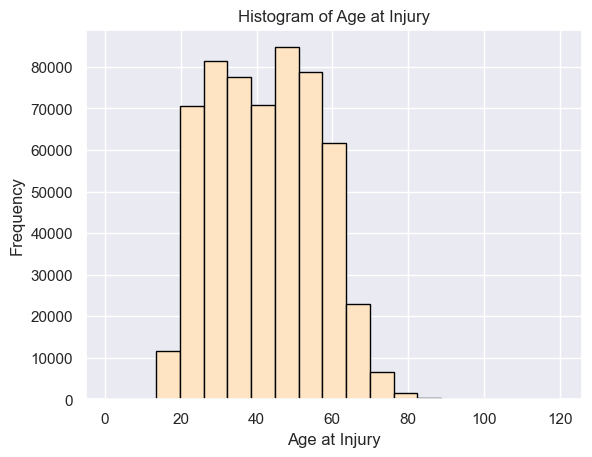

In [73]:
train_data['Age at Injury'].plot(
    kind='hist',
    color='bisque', 
    edgecolor='black',
    bins=19
)

plt.title('Histogram of Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency') 
plt.show()

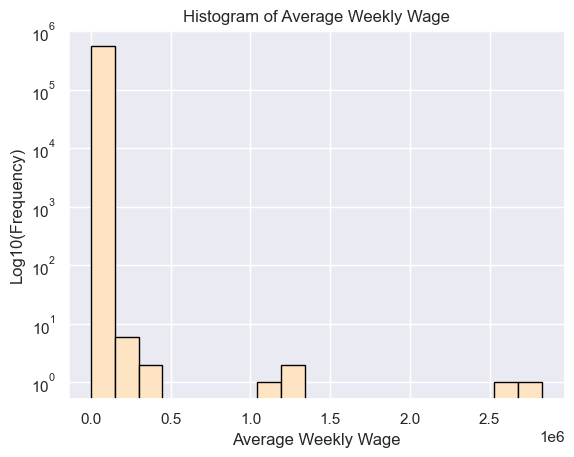

In [74]:
train_data['Average Weekly Wage'].plot(
    kind='hist',
    color='bisque',
    edgecolor='black',
    bins=19
)

plt.title('Histogram of Average Weekly Wage')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Log10(Frequency)')
plt.yscale('log')  
plt.show()   

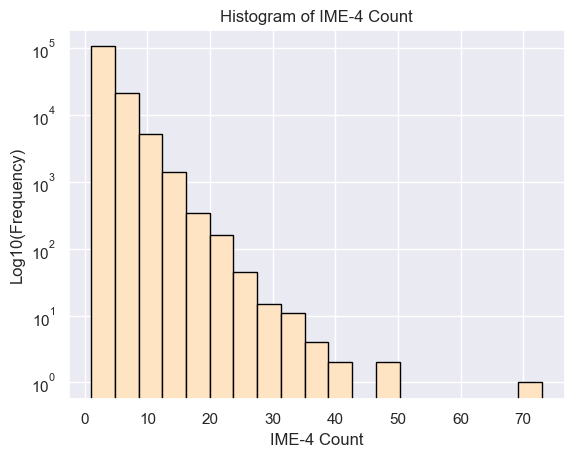

In [75]:
train_data['IME-4 Count'].plot(
    kind='hist',
    color='bisque', 
    edgecolor='black',
    bins=19
)

plt.title('Histogram of IME-4 Count')
plt.xlabel('IME-4 Count')
plt.ylabel('Log10(Frequency)')
plt.yscale('log')  
plt.show()   

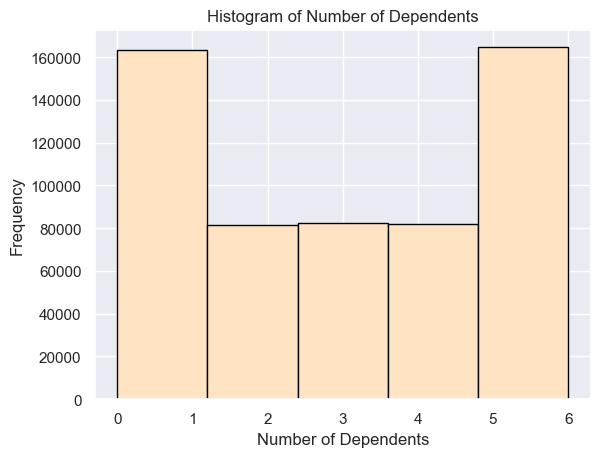

In [76]:
train_data['Number of Dependents'].plot(
    kind='hist',
    color='bisque', 
    edgecolor='black',
    bins=5
)

plt.title('Histogram of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency') 
plt.show()

In [77]:
# train_data['Birth Year'].plot(
#     kind='hist',
#     color='bisque', 
#     edgecolor='black',
#     bins=19
# )

# plt.title('Histogram of Birth Year')
# plt.xlabel('Birth Year')
# plt.ylabel('Frequency') 
# plt.show()

- Birth Year = 0
- Define a funtion to be able to see the values within a range

In [78]:
def plot_filtered_histogram(data, column_name, min_value, max_value, bins=19):
    
    filtered_data = train_data[(train_data[column_name] >= min_value) & (train_data[column_name] <= max_value)][column_name].dropna()
    
    #Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_data, bins=bins, color='bisque', edgecolor='black')
    plt.title(f'Histogram of {column_name} (range: {min_value} to {max_value})')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [80]:
# plot_filtered_histogram(train_data, column_name="Birth Year", min_value=1920, max_value=2024, bins=19)

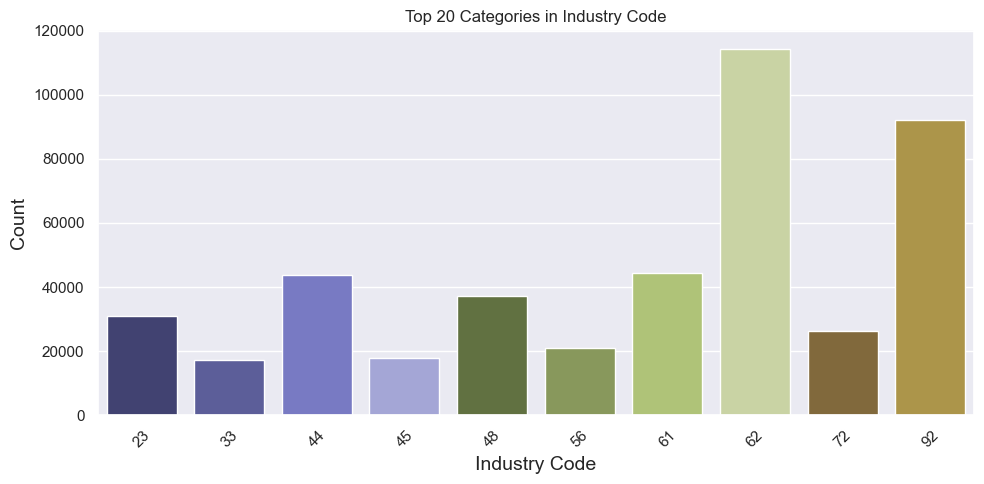

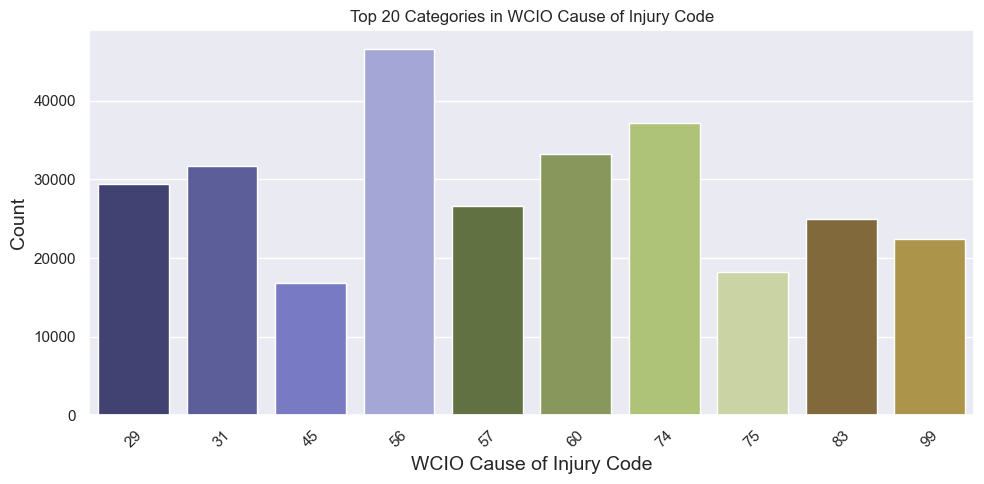

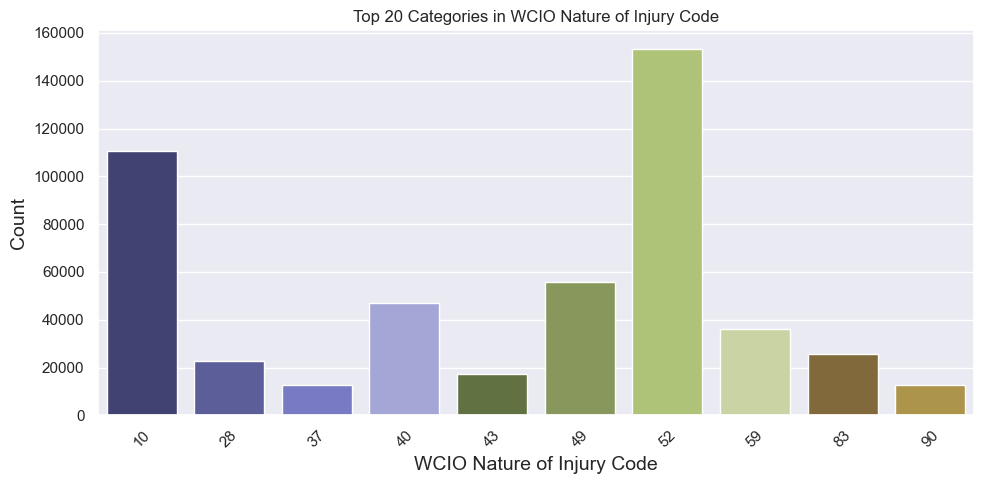

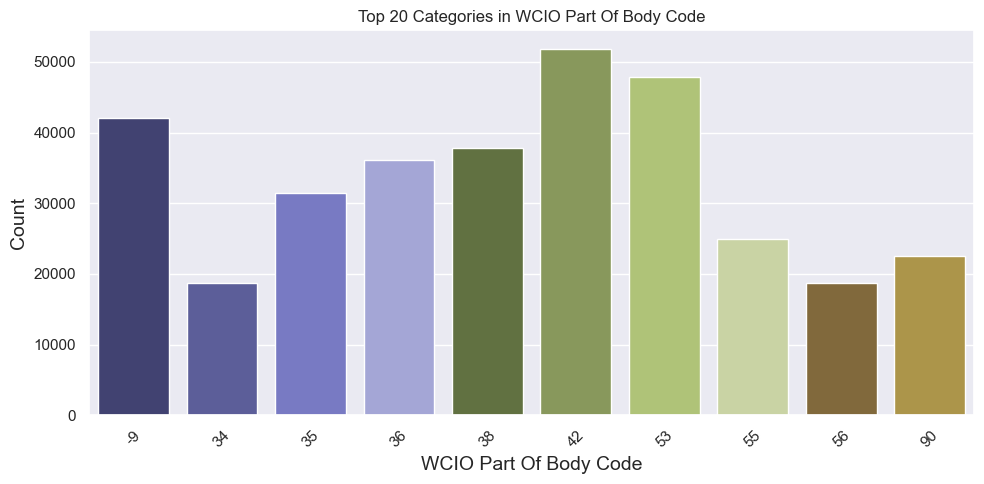

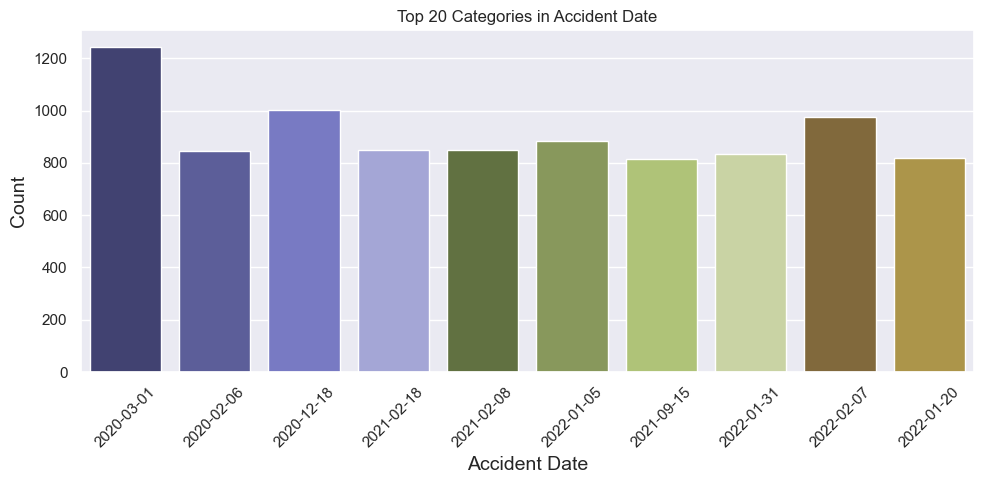

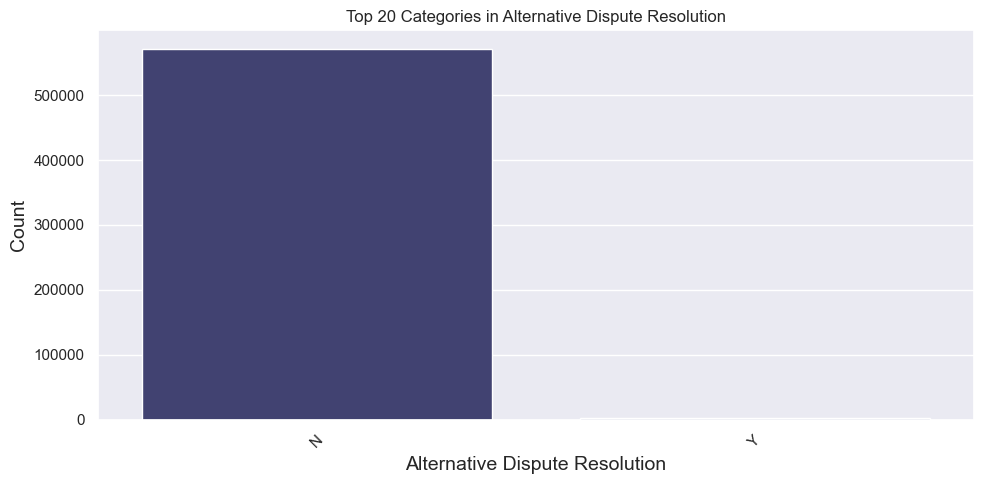

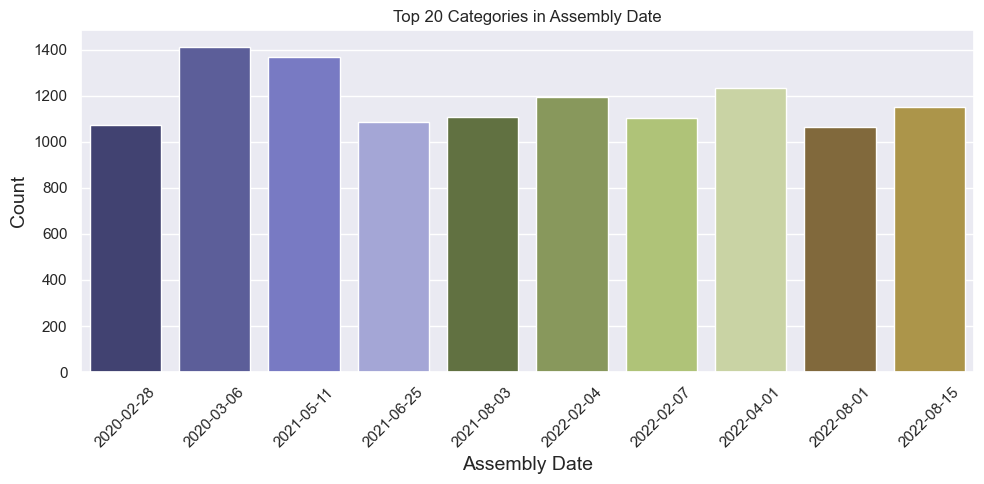

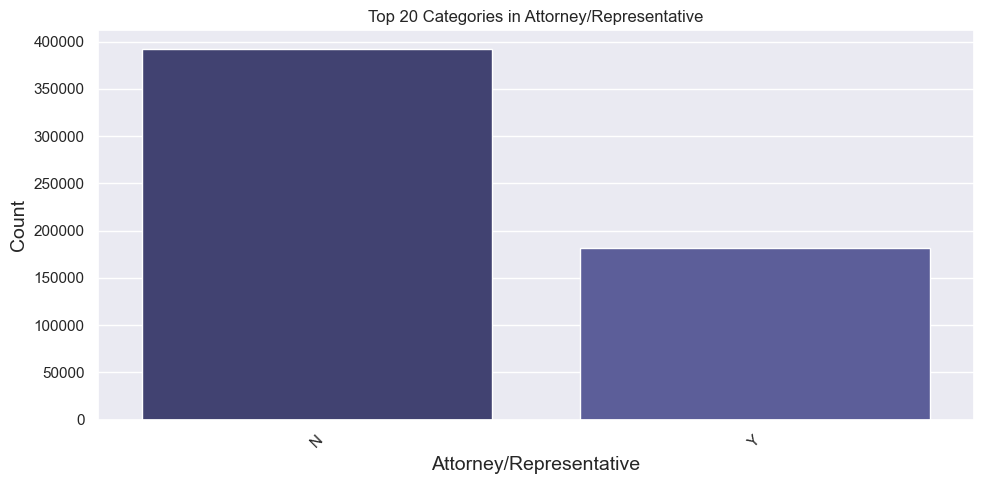

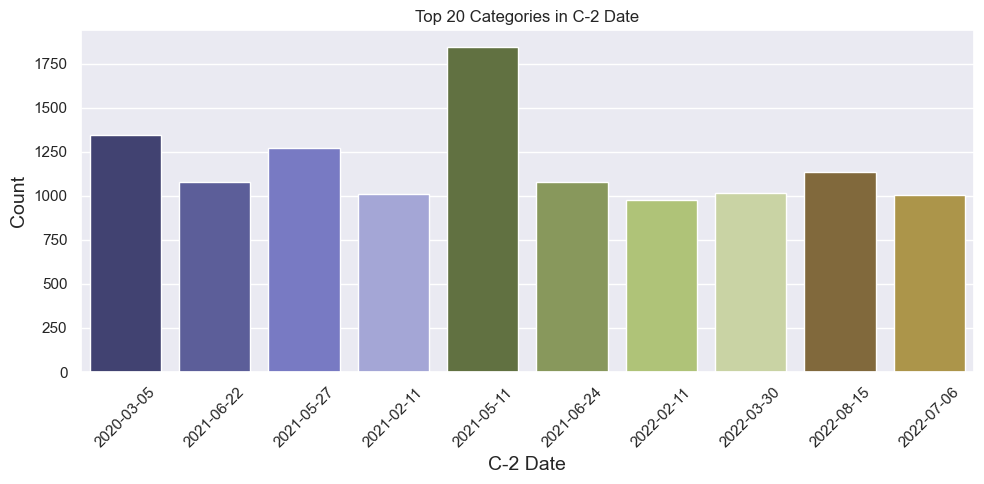

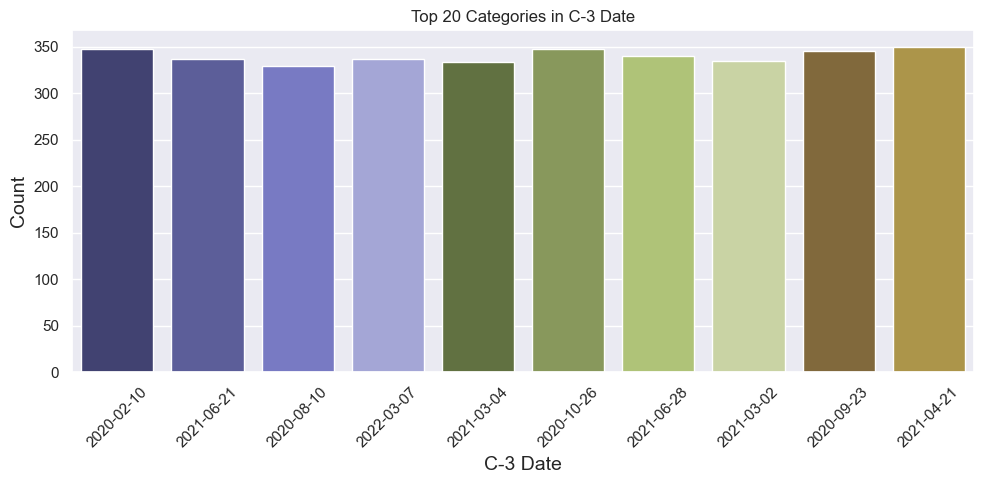

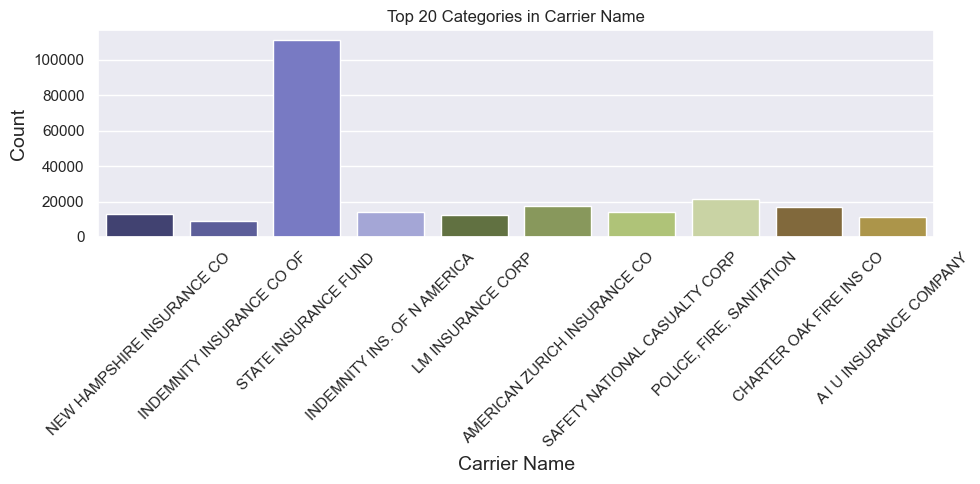

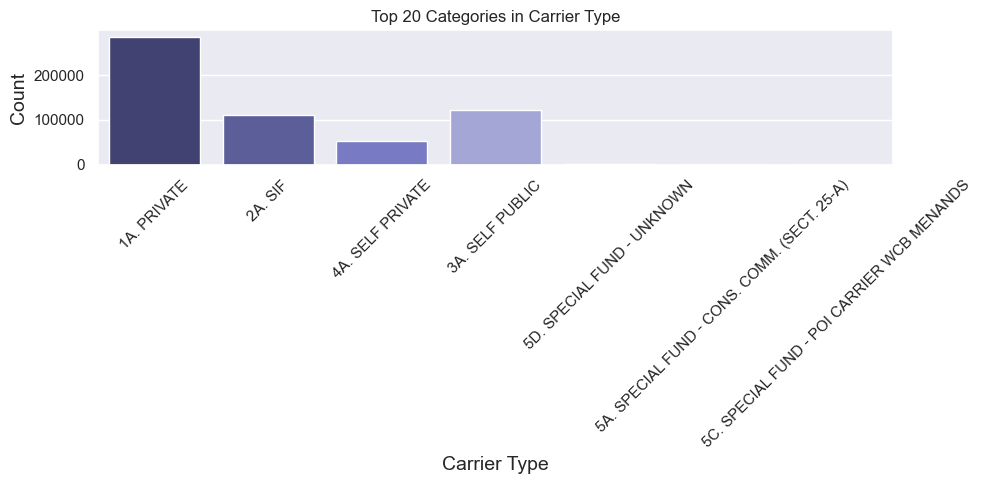

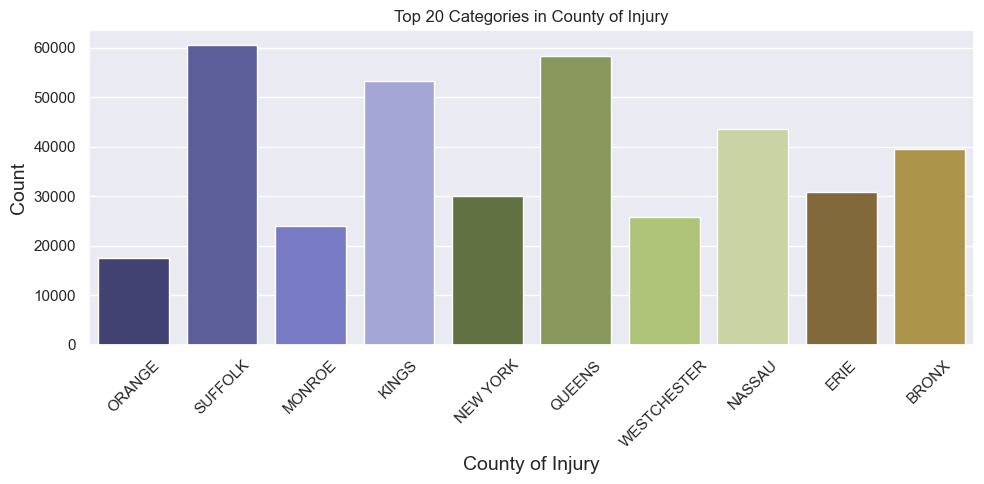

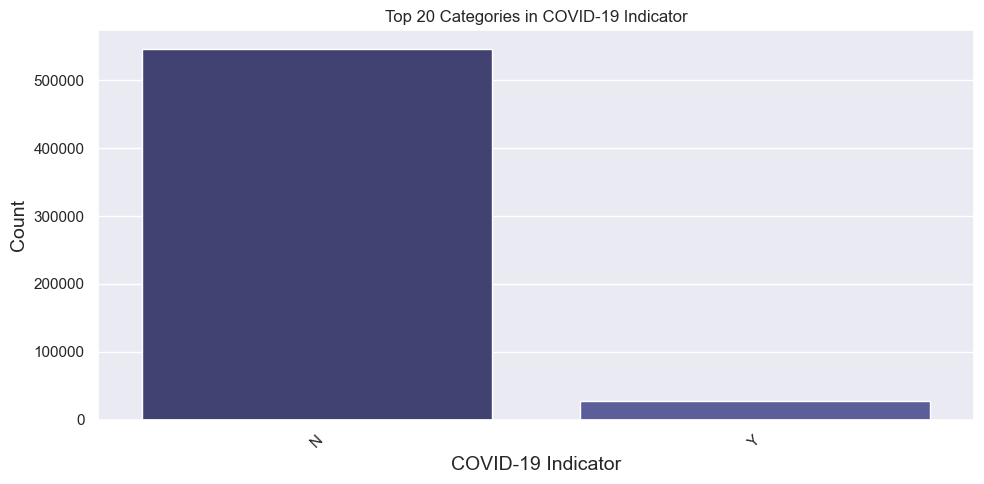

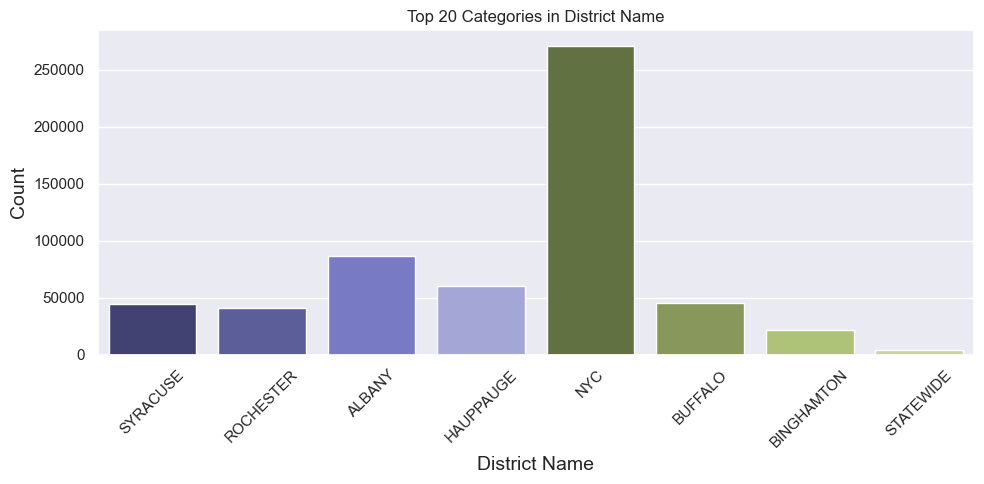

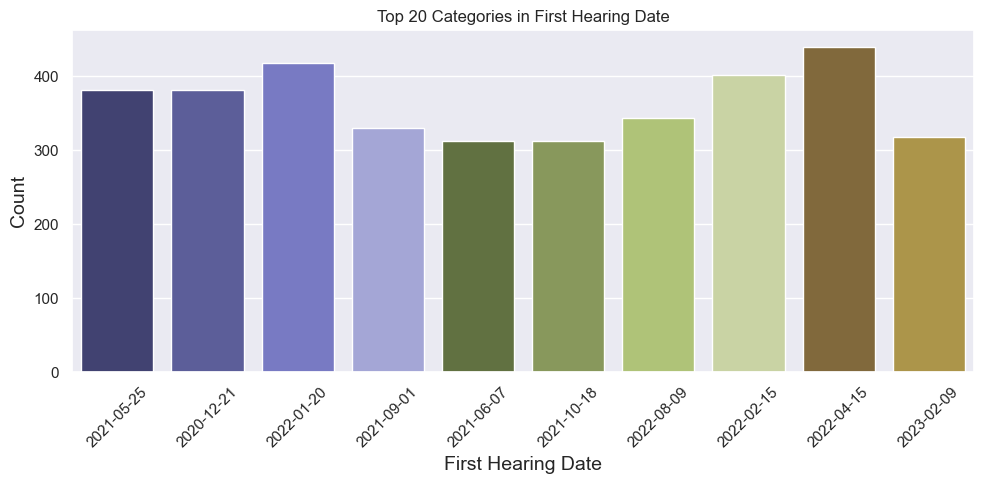

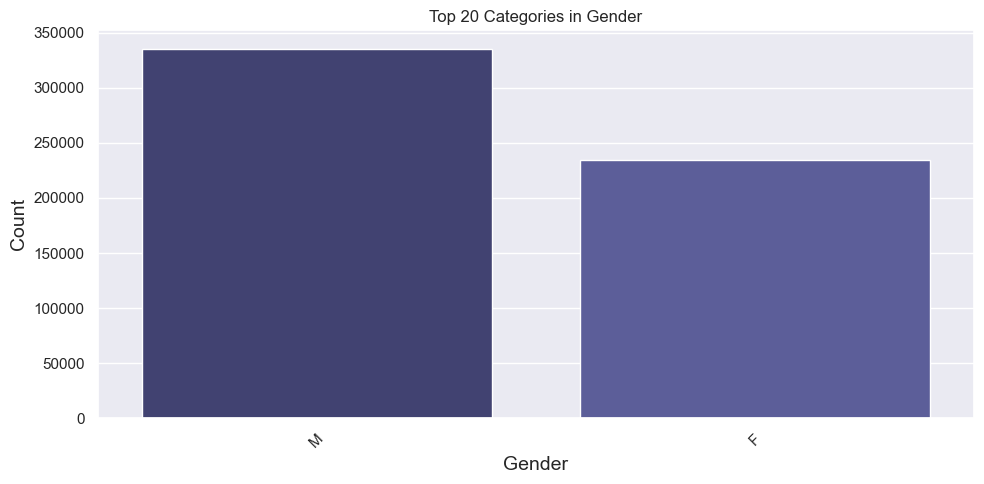

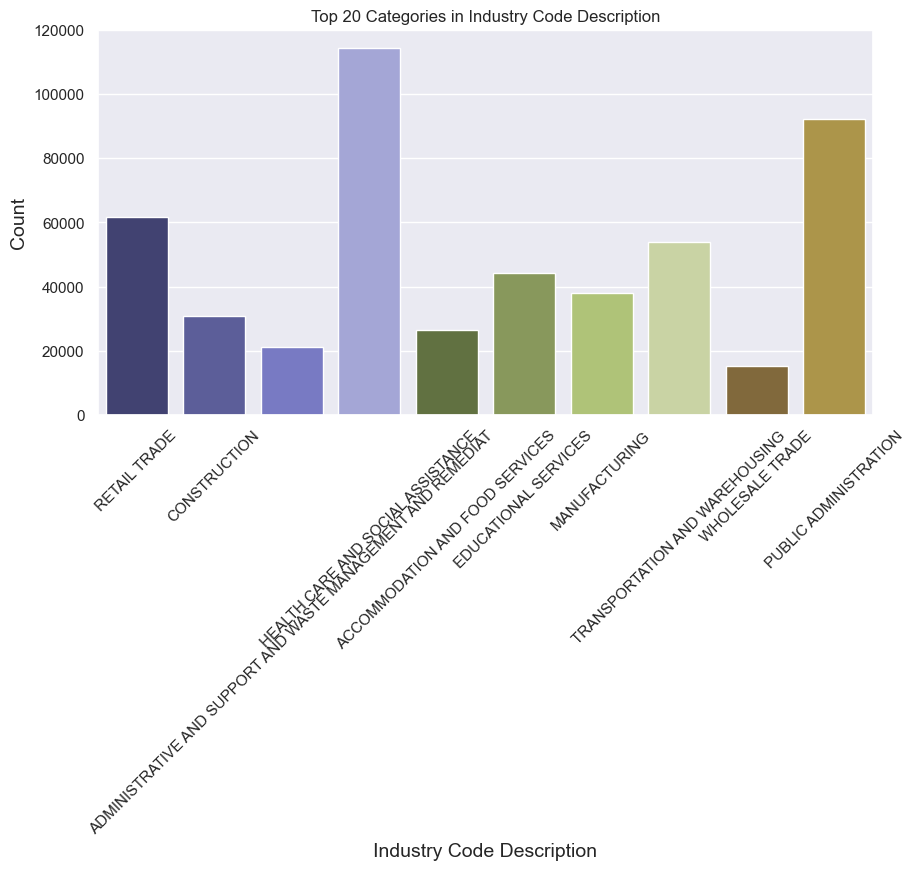

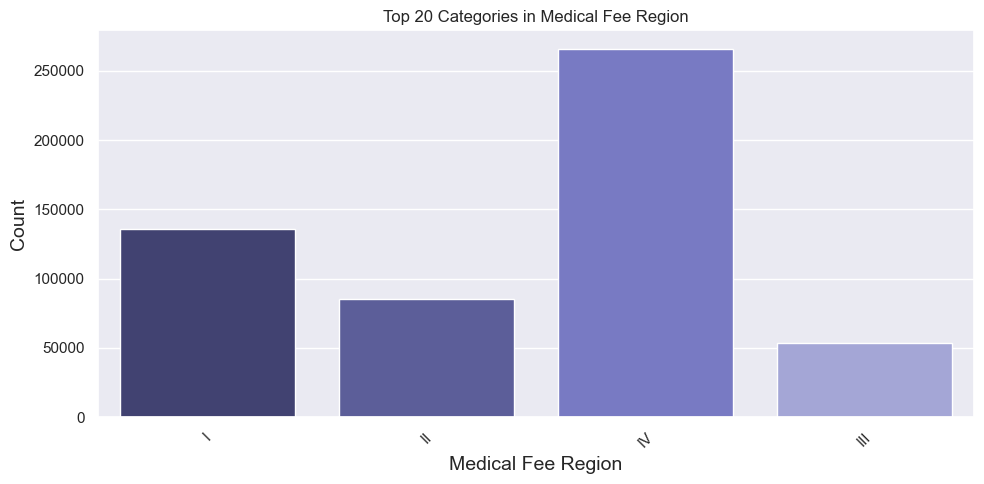

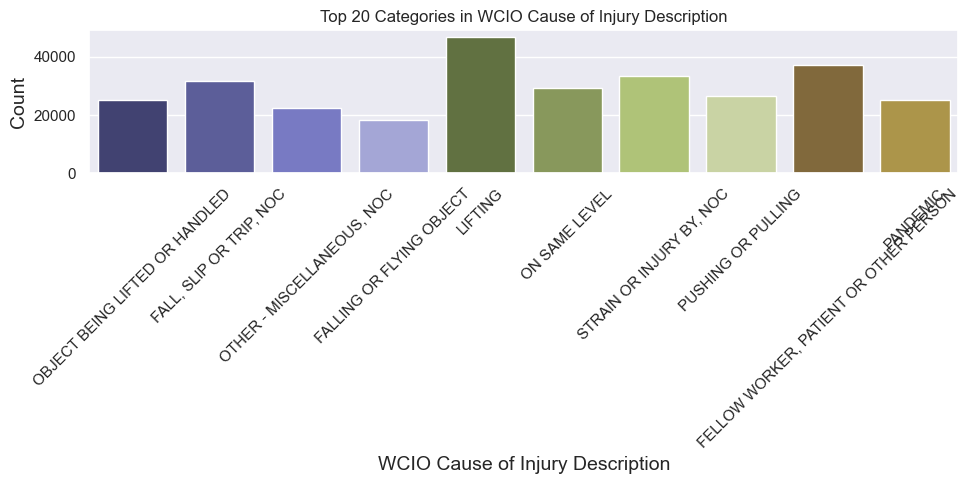

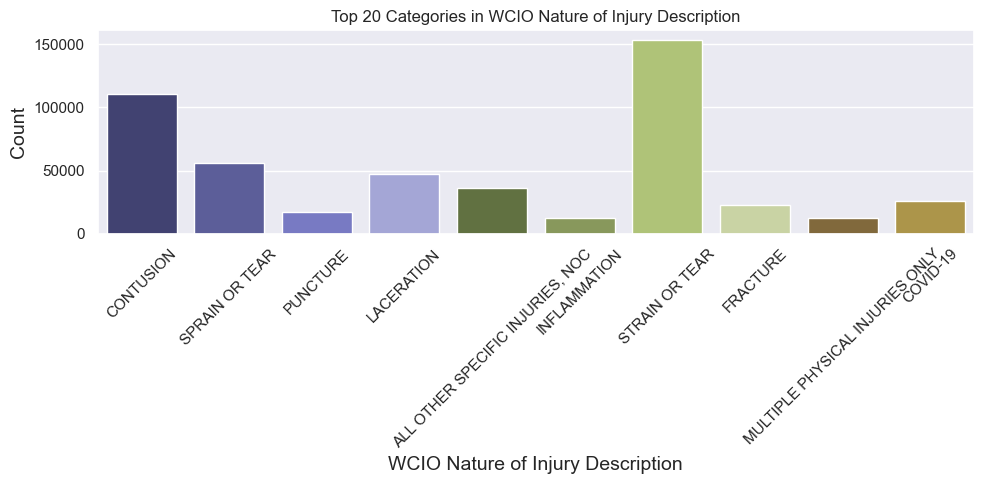

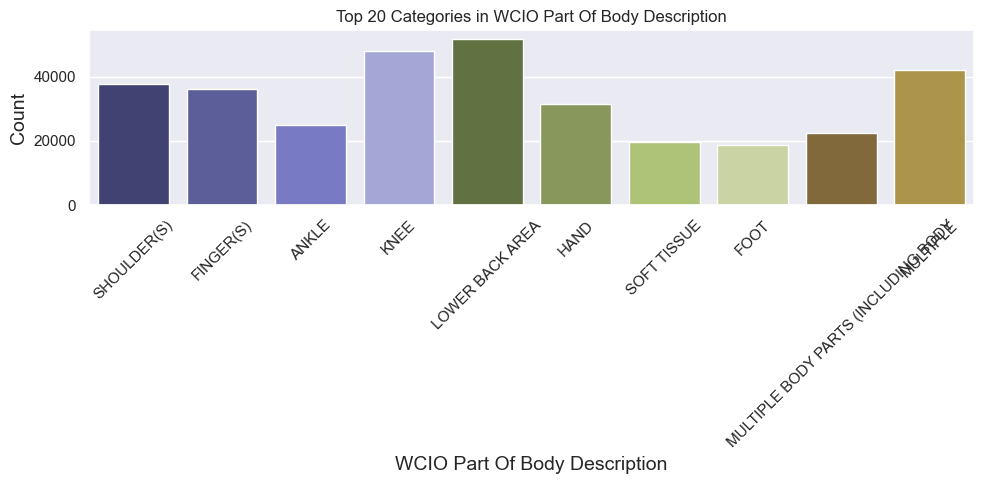

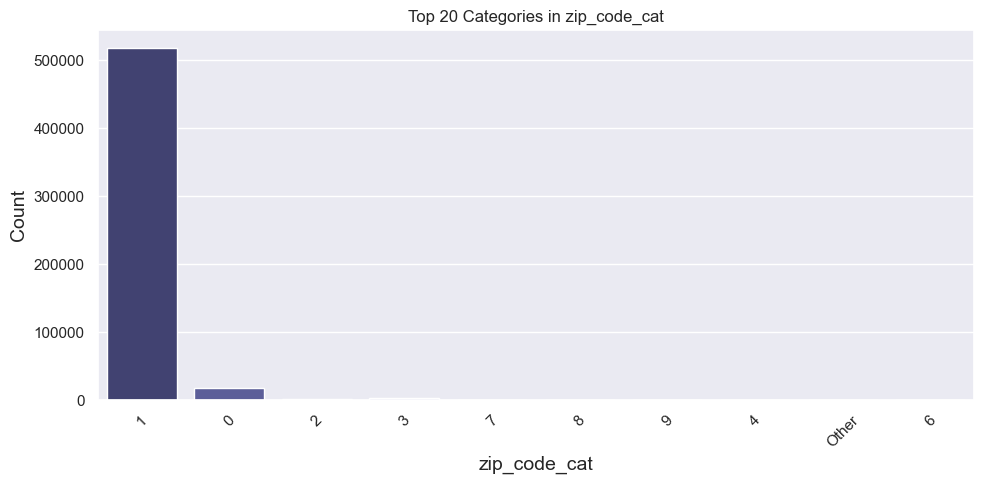

In [81]:
for column in non_metric_features:
    
    top_categories = train_data[column].value_counts().head(10).index
    data_filtered = train_data[train_data[column].isin(top_categories)]
   
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_filtered, 
                  x=column, 
                  palette='tab20b')
    
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Top 20 Categories in {column}')
    
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

#### Multivariate analysis

---

## 2. Data cleaning and pre-processing 

### 2.1 Checking for missing values in the target variable - Claim Injury Type

In [82]:
train_data["Claim Injury Type"].isna().sum()

1096

In [83]:
missing_data_target = train_data[train_data['Claim Injury Type'].isna()]
missing_data_target.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,zip_code_cat
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
957648180,NaT,<NA>,NaN,2020-01-01,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN
653337074,NaT,<NA>,NaN,2020-01-02,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN
489154817,NaT,<NA>,NaN,2020-01-03,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN
351928125,NaT,<NA>,NaN,2020-01-04,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN
454184427,NaT,<NA>,NaN,2020-01-05,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN


In [84]:
missing_data_target.info()
# all features with missing values on the target, are also missing, except Assembly Date -> not relevant (decision -> drop rows)

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 957648180 to 208342104
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Accident Date                      0 non-null      datetime64[ns]
 1   Age at Injury                      0 non-null      Int64         
 2   Alternative Dispute Resolution     0 non-null      object        
 3   Assembly Date                      1096 non-null   datetime64[ns]
 4   Attorney/Representative            0 non-null      object        
 5   Average Weekly Wage                0 non-null      float64       
 6   C-2 Date                           0 non-null      datetime64[ns]
 7   C-3 Date                           0 non-null      datetime64[ns]
 8   Carrier Name                       0 non-null      object        
 9   Carrier Type                       0 non-null      object        
 10  Claim Injury Type           

In [85]:
train_data= train_data.drop(missing_data_target.index)

Re check for missing values in the target variable

In [86]:
train_data['Claim Injury Type'].isna().sum()

0

---

### 2.2 Checking for missing values in the intependent variables

##### - Before we check for missing values in the independet variables we split our data into training and validation set

In [87]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)


##### Checking the number of missing values in each variable in the train and validation set (number and percentage)

In [89]:
# missing_values_train = X_train.isnull().sum().sort_values(ascending=False)
# print(missing_values_train)

In [90]:
# missing_values_val = X_val.isnull().sum().sort_values(ascending=False)
# print(missing_values_val)

In [91]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
print(missing_percentage_train)

IME-4 Count                          76.841199
First Hearing Date                   73.724108
C-3 Date                             67.325673
Medical Fee Region                    5.804881
zip_code_cat                          4.992571
Average Weekly Wage                   4.990331
WCIO Part Of Body Description         2.979715
WCIO Part Of Body Code                2.979715
WCIO Nature of Injury Description     2.739556
WCIO Nature of Injury Code            2.739556
WCIO Cause of Injury Description      2.735574
WCIO Cause of Injury Code             2.735574
C-2 Date                              2.540958
Industry Code Description             1.729394
Industry Code                         1.729394
Age at Injury                         0.931021
Gender                                0.843668
Accident Date                         0.642083
Carrier Type                          0.315318
Carrier Name                          0.315318
County of Injury                      0.202082
Alternative D

In [92]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
print(missing_percentage_val)

IME-4 Count                          76.919191
First Hearing Date                   73.743380
C-3 Date                             67.508478
Medical Fee Region                    5.892293
zip_code_cat                          5.036351
Average Weekly Wage                   4.993380
WCIO Part Of Body Description         2.966180
WCIO Part Of Body Code                2.966180
WCIO Nature of Injury Description     2.699062
WCIO Nature of Injury Code            2.699062
WCIO Cause of Injury Description      2.698481
WCIO Cause of Injury Code             2.698481
C-2 Date                              2.525434
Industry Code Description             1.746725
Industry Code                         1.746725
Age at Injury                         0.945949
Gender                                0.793807
Accident Date                         0.643408
Carrier Type                          0.294411
Carrier Name                          0.294411
County of Injury                      0.222986
Alternative D

In [93]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
print(missing_percentage_test)

IME-4 Count                          90.914621
First Hearing Date                   88.909595
C-3 Date                             78.035698
Medical Fee Region                    5.406792
zip_code_cat                          5.009859
Average Weekly Wage                   4.949803
WCIO Nature of Injury Description     2.721825
WCIO Nature of Injury Code            2.721825
WCIO Cause of Injury Description      2.667182
WCIO Cause of Injury Code             2.667182
WCIO Part Of Body Description         2.461241
WCIO Part Of Body Code                2.461241
C-2 Date                              2.354275
Industry Code Description             1.993943
Industry Code                         1.993943
Gender                                1.446743
Age at Injury                         0.796701
Accident Date                         0.629937
Carrier Type                          0.423223
Carrier Name                          0.423223
County of Injury                      0.235840
Alternative D

Variables such as ***IME-4 Count*** , ***First Hearing Date*** and ***C-3 Date*** have more than 60% of missing values. 
<br> We decided to drop  ***IME-4 Count*** and ***C-3 Date*** becuase they have so many missing values that it does not make sense to impute them (not enough information for taking that as sample for the whole population).
<br> We do not drop ***First Hearing Date*** variable, because blank date (missing value) means the claim has not yet had a hearing held. Thus, it is an information that we want to keep.

In [94]:
columns_to_drop = ['IME-4 Count','C-3 Date']
X_train =X_train.drop(columns_to_drop, axis=1)
X_val =X_val.drop(columns_to_drop, axis=1)
test_data = test_data.drop(columns_to_drop, axis=1)

metric_features.remove('IME-4 Count')
non_metric_features.remove('C-3 Date')


We decided to change vairable First Hearing Date to binary variable, where NaN values are replaced by 0 - it means that claim has not had a hearing held yet and dataes are replaced by 1 which means that hearings has been already held.

In [95]:
X_train['First Hearing Date Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Date Binary'] = X_val['First Hearing Date'].notna().astype(int)
test_data['First Hearing Date Binary'] = test_data['First Hearing Date'].notna().astype(int)

X_train[['First Hearing Date', 'First Hearing Date Binary']].head()


,First Hearing Date,First Hearing Date Binary
Claim Identifier,,
5935707,NaT,0
5868764,NaT,0
5986945,NaT,0
5665055,NaT,0
5595404,NaT,0


First Hearing Data variable can be droped after creating binary variable.

In [96]:
X_train =X_train.drop("First Hearing Date", axis=1)
X_val =X_val.drop("First Hearing Date", axis=1)
test_data =test_data.drop("First Hearing Date", axis=1)

In [97]:
non_metric_features.remove('First Hearing Date')
non_metric_features.append('First Hearing Date Binary')

Checking for all missing values in all WCIO_columns. WCIO_colums are important during decision of defininunf injury type.

In [98]:
WCIO_columns = [
    'WCIO Part Of Body Code', 
    'WCIO Part Of Body Description', 
    'WCIO Nature of Injury Description', 
    'WCIO Nature of Injury Code', 
    'WCIO Cause of Injury Description', 
    'WCIO Cause of Injury Code'
]

# Display rows where all WCIO columns contain NaN values
WCIO_nan_rows = X_train[X_train[WCIO_columns].isna().all(axis=1)]

count_all_nan_WCIO = X_train[WCIO_columns].isna().all(axis=1).sum()
print("Rows with all NaN values in WCIO columns:", count_all_nan_WCIO)


# Calculate the percentage of these rows in the whole dataset
percentage_all_nan_WCIO = (count_all_nan_WCIO / len(X_train)) * 100

# Display the result
print(f"Percentage of rows with all NaN values in WCIO columns: {percentage_all_nan_WCIO:.2f}%")
WCIO_nan_rows.head()


Rows with all NaN values in WCIO columns: 10359
Percentage of rows with all NaN values in WCIO columns: 2.58%


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,Carrier Name,Carrier Type,County of Injury,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,zip_code_cat,First Hearing Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5768696,2020-11-11,37,N,2021-07-19,Y,0.0,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,QUEENS,...,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,6,NaN,1
5922635,2020-04-06,47,N,2022-02-15,N,0.0,NaT,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,NASSAU,...,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,5,1,0
5532393,2020-03-25,63,N,2020-08-07,Y,0.0,NaT,BOARD OF EDUCATION CNY,3A. SELF PUBLIC,KINGS,...,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,1,1,0
5749747,2021-06-05,32,N,2021-06-23,N,0.0,NaT,NaN,NaN,ERIE,...,II,<NA>,NaN,<NA>,NaN,<NA>,NaN,1,1,0
5723432,NaT,<NA>,N,2021-05-17,N,0.0,NaT,CORNELL UNIVERSITY,4A. SELF PRIVATE,TOMPKINS,...,I,<NA>,NaN,<NA>,NaN,<NA>,NaN,1,1,0


In [99]:
WCIO_columns = [
    'WCIO Part Of Body Code', 
    'WCIO Part Of Body Description', 
    'WCIO Nature of Injury Description', 
    'WCIO Nature of Injury Code', 
    'WCIO Cause of Injury Description', 
    'WCIO Cause of Injury Code'
]

# Display rows where all WCIO columns contain NaN values
WCIO_nan_rows = X_val[X_val[WCIO_columns].isna().all(axis=1)]

count_all_nan_WCIO = X_val[WCIO_columns].isna().all(axis=1).sum()
print("Rows with all NaN values in WCIO columns:", count_all_nan_WCIO)


# Calculate the percentage of these rows in the whole dataset
percentage_all_nan_WCIO = (count_all_nan_WCIO / len(X_val)) * 100

# Display the result
print(f"Percentage of rows with all NaN values in WCIO columns: {percentage_all_nan_WCIO:.2f}%")
WCIO_nan_rows.head()


Rows with all NaN values in WCIO columns: 4404
Percentage of rows with all NaN values in WCIO columns: 2.56%


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,Carrier Name,Carrier Type,County of Injury,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,zip_code_cat,First Hearing Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5430908,2020-02-04,52,Y,2020-02-18,Y,0.0,NaT,ELECTRICAL EMPLOYERS,4A. SELF PRIVATE,NEW YORK,...,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,0,1,0
5779810,2021-07-28,50,N,2021-08-03,Y,0.0,NaT,BERKLEY REGIONAL INS COMPANY,1A. PRIVATE,QUEENS,...,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,4,1,0
5892073,2021-12-16,39,N,2022-01-06,Y,NaN,NaT,NYC HOUSING AUTHORITY,3A. SELF PUBLIC,NEW YORK,...,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,0,0,0
5899819,2022-01-07,33,N,2022-01-18,Y,0.0,NaT,CHARTER OAK FIRE INS CO,1A. PRIVATE,MONROE,...,II,<NA>,NaN,<NA>,NaN,<NA>,NaN,5,NaN,0
5592992,2020-08-31,40,N,2020-11-05,Y,0.0,NaT,UTICA NATIONAL INS CO OF OHIO,1A. PRIVATE,QUEENS,...,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,4,1,0


Dropping rows where all WCIO columns contain NaN values.

In [100]:
X_train = X_train[~X_train[WCIO_columns].isna().all(axis=1)]
X_val = X_val[~X_val[WCIO_columns].isna().all(axis=1)]

Checking the missing percentage for the datasets

In [101]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
missing_percentage_train = missing_percentage_train[missing_percentage_train > 0]
print(missing_percentage_train)

Medical Fee Region                   5.720920
Average Weekly Wage                  4.989552
zip_code_cat                         4.988786
Gender                               0.852710
Age at Injury                        0.531091
WCIO Part Of Body Description        0.412305
WCIO Part Of Body Code               0.412305
Accident Date                        0.381906
Industry Code                        0.253923
Industry Code Description            0.253923
County of Injury                     0.201299
WCIO Nature of Injury Description    0.165790
WCIO Nature of Injury Code           0.165790
WCIO Cause of Injury Code            0.161703
WCIO Cause of Injury Description     0.161703
Carrier Type                         0.103204
Carrier Name                         0.103204
C-2 Date                             0.002810
dtype: float64


In [102]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
missing_percentage_val = missing_percentage_val[missing_percentage_val > 0]
print(missing_percentage_val)

Medical Fee Region                   5.812734
zip_code_cat                         5.040404
Average Weekly Wage                  4.988558
Gender                               0.807490
Age at Injury                        0.532168
WCIO Part Of Body Description        0.419537
WCIO Part Of Body Code               0.419537
Accident Date                        0.370075
Industry Code                        0.271746
Industry Code Description            0.271746
County of Injury                     0.218708
WCIO Nature of Injury Description    0.145408
WCIO Nature of Injury Code           0.145408
WCIO Cause of Injury Code            0.144812
WCIO Cause of Injury Description     0.144812
Carrier Type                         0.089986
Carrier Name                         0.089986
C-2 Date                             0.002384
dtype: float64


In [103]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
missing_percentage_test = missing_percentage_test[missing_percentage_test > 0]
print(missing_percentage_test)

Medical Fee Region                   5.406792
zip_code_cat                         5.009859
Average Weekly Wage                  4.949803
WCIO Nature of Injury Description    2.721825
WCIO Nature of Injury Code           2.721825
WCIO Cause of Injury Description     2.667182
WCIO Cause of Injury Code            2.667182
WCIO Part Of Body Description        2.461241
WCIO Part Of Body Code               2.461241
C-2 Date                             2.354275
Industry Code Description            1.993943
Industry Code                        1.993943
Gender                               1.446743
Age at Injury                        0.796701
Accident Date                        0.629937
Carrier Type                         0.423223
Carrier Name                         0.423223
County of Injury                     0.235840
Alternative Dispute Resolution       0.000258
dtype: float64


### - Dealing with missing values

Acording to WCIO website codes that contains in the description word multiple are: 10, 20, 30, 40, 50, 90, 91. Thus, we decided to fill -9 those values with mode amonog codes that corresponds to multiple. We used mode to replace -9 becuase WCIO Part of Body Code is a categorical variable.

In [104]:
# Define the valid codes for "Multiple"
multiple_codes = [10, 20, 30, 40, 50, 90, 91]

# Calculate the mode among the valid multiple codes
mode_value = X_train[X_train["WCIO Part Of Body Code"].isin(multiple_codes)]["WCIO Part Of Body Code"].mode()[0]

# Replace only -9 values with the mode, leaving other NaN values unchanged
X_train["WCIO Part Of Body Code"] = X_train["WCIO Part Of Body Code"].replace(-9, mode_value)

test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].replace(-9, mode_value)

X_val["WCIO Part Of Body Code"] = X_val["WCIO Part Of Body Code"].replace(-9, mode_value)


print(X_train["WCIO Part Of Body Code"].value_counts(dropna=False))

WCIO Part Of Body Code
90      45414
42      36289
53      33599
38      26413
36      25203
35      22041
55      17382
34      13092
56      13055
33      10760
60       9748
18       9738
14       9020
37       8764
54       8156
31       7858
91       7572
32       6957
41       5830
10       5659
11       5484
44       5299
61       4703
51       4550
66       4278
25       4180
65       3705
52       2962
19       2705
13       2704
48       2646
20       2015
39       1856
30       1838
57       1792
<NA>     1614
15       1444
12       1426
63       1418
50       1386
43       1333
58       1275
40       1222
17       1120
21        958
99        859
62        801
22        740
16        558
46        518
49        434
23        339
45        282
47        268
24        102
26         59
64         35
Name: count, dtype: Int64


- All missing values in the variable ***Average Weekly Wage*** are replaced by using median (it is a continous variable)

In [105]:
median_wage = X_train["Average Weekly Wage"].median()
X_train["Average Weekly Wage"].fillna(median_wage, inplace=True)

X_val["Average Weekly Wage"].fillna(median_wage, inplace=True)
test_data["Average Weekly Wage"].fillna(median_wage, inplace=True)


- Replacing missing values in variable Age at Injury with mean (That variable is almost normal distributed)

In [106]:
mean_age = int(X_train["Age at Injury"].mean())

X_train["Age at Injury"].fillna(mean_age, inplace=True)

X_val["Age at Injury"].fillna(mean_age, inplace=True)

test_data["Age at Injury"].fillna(mean_age, inplace=True)

- Replacing missing values in ***zip_code_cat*** with mode - categorical variable

In [107]:
mode_value = X_train['zip_code_cat'].mode()[0]  

# Replace NaN values in 'zip_code_cat' with the mode
X_train['zip_code_cat'].fillna(mode_value, inplace=True)
X_val['zip_code_cat'].fillna(mode_value, inplace=True)
test_data['zip_code_cat'].fillna(mode_value, inplace=True)

# Display the updated DataFrame and the distribution of the new category
X_train['zip_code_cat'].value_counts(dropna=False)  # Include NaN if still any 

zip_code_cat
1        373339
0         12132
3          2392
2          1429
7           499
9           488
4           355
8           286
Other       231
6           177
5           130
Name: count, dtype: int64

- Variables that has less than 1% of with missing values

In [108]:
# List of categorical columns that missing values should be replaced with mode
mode_variables = [
    'Medical Fee Region',
    'zip_code_cat',
    'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',
    'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',
    'WCIO Cause of Injury Description',
    'WCIO Cause of Injury Code',
    'C-2 Date',
    'Industry Code',
    'Industry Code Description',
    'Gender',
    'Accident Date',
    'Carrier Type',
    'Carrier Name',
    'County of Injury'
]

In [109]:
for column in mode_variables:
    mode_value = X_train[column].mode()
    if not mode_value.empty:
        X_train[column] = X_train[column].fillna(mode_value[0])
        X_val[column] = X_val[column].fillna(mode_value[0])  
        test_data[column] = test_data[column].fillna(mode_value[0])

---

Re check for number of  missing values

In [110]:
X_train.isna().sum().sort_values(ascending=False)

Accident Date                        0
Industry Code                        0
zip_code_cat                         0
Number of Dependents                 0
WCIO Part Of Body Description        0
WCIO Part Of Body Code               0
WCIO Nature of Injury Description    0
WCIO Nature of Injury Code           0
WCIO Cause of Injury Description     0
WCIO Cause of Injury Code            0
Medical Fee Region                   0
Industry Code Description            0
Gender                               0
Age at Injury                        0
District Name                        0
COVID-19 Indicator                   0
County of Injury                     0
Carrier Type                         0
Carrier Name                         0
C-2 Date                             0
Average Weekly Wage                  0
Attorney/Representative              0
Assembly Date                        0
Alternative Dispute Resolution       0
First Hearing Date Binary            0
dtype: int64

In [111]:
X_val.isna().sum().sort_values(ascending=False)

Accident Date                        0
Industry Code                        0
zip_code_cat                         0
Number of Dependents                 0
WCIO Part Of Body Description        0
WCIO Part Of Body Code               0
WCIO Nature of Injury Description    0
WCIO Nature of Injury Code           0
WCIO Cause of Injury Description     0
WCIO Cause of Injury Code            0
Medical Fee Region                   0
Industry Code Description            0
Gender                               0
Age at Injury                        0
District Name                        0
COVID-19 Indicator                   0
County of Injury                     0
Carrier Type                         0
Carrier Name                         0
C-2 Date                             0
Average Weekly Wage                  0
Attorney/Representative              0
Assembly Date                        0
Alternative Dispute Resolution       0
First Hearing Date Binary            0
dtype: int64

In [112]:
test_data.isna().sum().sort_values(ascending=False)

Alternative Dispute Resolution       1
Accident Date                        0
Industry Code                        0
zip_code_cat                         0
Number of Dependents                 0
WCIO Part Of Body Description        0
WCIO Part Of Body Code               0
WCIO Nature of Injury Description    0
WCIO Nature of Injury Code           0
WCIO Cause of Injury Description     0
WCIO Cause of Injury Code            0
Medical Fee Region                   0
Industry Code Description            0
Gender                               0
Age at Injury                        0
District Name                        0
COVID-19 Indicator                   0
County of Injury                     0
Carrier Type                         0
Carrier Name                         0
C-2 Date                             0
Average Weekly Wage                  0
Attorney/Representative              0
Assembly Date                        0
First Hearing Date Binary            0
dtype: int64

---

- After analysis we also decided to drop variables that contain descriptions of other coded variables.

In [ ]:
columns_to_drop_desc = ['WCIO Part Of Body Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name']

X_train =X_train.drop(columns_to_drop_desc, axis=1)
X_val = X_val.drop(columns_to_drop_desc, axis=1)
test_data =test_data.drop(columns_to_drop_desc, axis=1)

non_metric_features = [feature for feature in non_metric_features if feature not in columns_to_drop_desc]


---

## 2.3 Outliers

Let's start by plotting some box plots to see the behaviour of the dataset on the metric features

In [ ]:
print(metric_features)

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure

sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(10, 6),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

In [ ]:
#Plotting the numeric variables' box plot all in one figure
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Numeric Variables' Box Plots", fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Define colors for each plot
colors = sns.color_palette("pastel")

# Creating box plots with improvements
sns.boxplot(data=X_train, x='Age at Injury', ax=axes[0, 0], color=colors[0])
sns.boxplot(data=X_train, x='Average Weekly Wage', ax=axes[0, 1], color=colors[1])             # Log scale example
sns.boxplot(data=X_train, x='Birth Year', ax=axes[1, 0], color=colors[2])
sns.boxplot(data=X_train, x='Number of Dependents', ax=axes[1, 1], color=colors[4])

# Rotate x-axis labels if needed
for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)

plt.show()

### Outlier Removal

In [ ]:
#Start by computing the interquartile range
q1 = train_data[metric_features].quantile(0.25)
q3 = train_data[metric_features].quantile(0.75)
iqr = q3 - q1

#Now we are going to compute the limits:
lower_lim = q1 - (1.5 * iqr)
upper_lim = q3 + (1.5 * iqr)

for feature in metric_features:
    print(f"{feature:<25}  Lower Limit: {lower_lim[feature]:>10}      Upper Limit: {upper_lim[feature]:>10}")

Let's detect 'obvious' outliers, those where every characteristic in outside the interquartile range

In [ ]:
def identify_outliers(train_data, metric_features, lower_lim, upper_lim):
    outliers = {}
    obvious_outliers = []

    for metric in metric_features:
        if metric not in train_data.columns:
            continue
        
        if metric not in lower_lim or metric not in upper_lim:
            continue
        
        outliers[metric] = []
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        
        for i, value in enumerate(train_data[metric]):
            if pd.isna(value):
                continue
            
            if value < llim or value > ulim:
                outliers[metric].append(value)
        
        print(f"Total outliers in {metric}: {len(outliers[metric])}")

    # Check for observations that are outliers in all features (Obvious Outliers)
    for index, row in train_data.iterrows():
        is_global_outlier = True
        for metric in metric_features:
            if metric not in train_data.columns or metric not in lower_lim or metric not in upper_lim:
                is_global_outlier = False
                break
            
            value = row[metric]
            if pd.isna(value):
                is_global_outlier = False
                break
            
            llim = lower_lim[metric]
            ulim = upper_lim[metric]
            
            if llim <= value <= ulim:
                is_global_outlier = False
                break
        
        if is_global_outlier:
            obvious_outliers.append(index)
    print("-----------------------------")
    print(f"Total global outliers: {len(obvious_outliers)}")
    return outliers, obvious_outliers
    
    
outliers, obvious_outliers = identify_outliers(X_train, metric_features, lower_lim, upper_lim)

As we could see, there is no observation that has every characteristic outside the interquartile range, since there is no outlier in 'Number of Dependents'.
But let's try this program again but without that feature, to see if there is any observation only with outliers, except on this feature!

In [ ]:
metric_features_test =["Age at Injury", "Average Weekly Wage", "Birth Year"]

In [ ]:
outliers, obvious_outliers = identify_outliers(X_train, metric_features_test, lower_lim, upper_lim)

So, we conclude that there aren't any obvious outliers

Now let's create a filter that will verify if an observation has every characteristic in the Interquartile Range or not 

In [ ]:
filters_iqr = []                                            
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters_iqr.append(X_train[metric].between(llim, ulim, inclusive='neither'))

filters_iqr_all = pd.concat(filters_iqr, axis=1).all(axis=1)

In [ ]:
filters_iqr

In [ ]:
filters_iqr_all  

In [ ]:
len(X_train[X_train[filters_iqr_all] == 'False'])      #These are the features that have at least one of its characteristics considered as an outlier (out of the IQR)

In [ ]:
X_train_iqr = X_train[filters_iqr_all]
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_iqr.shape[0] / X_train.shape[0], decimals=2)))

Just to be sure about the outliers, let's try another method:

### **Manual Outlier Removal** 

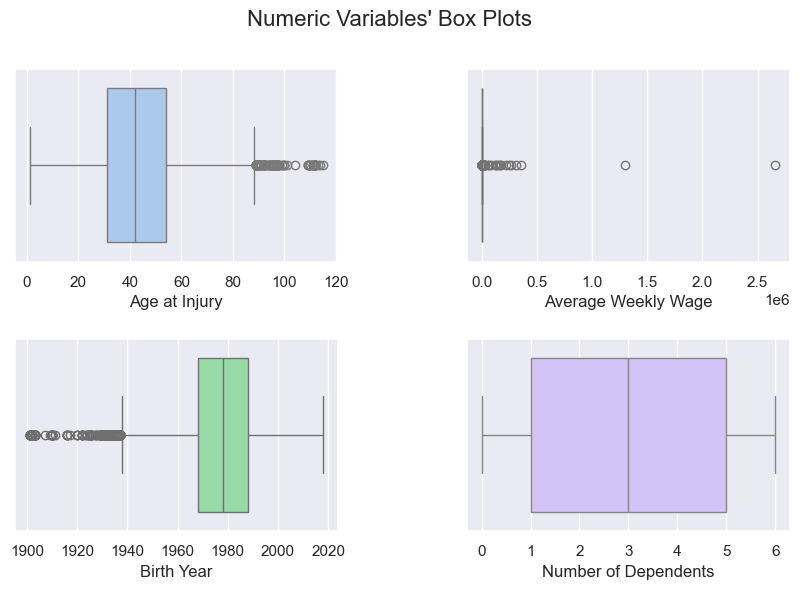

In [ ]:
filters_manual1 = (
                (X_train["Age at Injury"] <= 100)
                &
                (X_train["Average Weekly Wage"] <= 0.3*1e6)
                &
                (X_train["Birth Year"] >= 1950)                            
                #&
                #(X_train["Number of Dependents"])                        #There are no outliers here, so I think there is no manual restriction to make
)
X_train_out_man = X_train[filters_manual1]

In [ ]:
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_out_man.shape[0] / X_train.shape[0], decimals=5)))

In [ ]:
X_train_out = X_train[(filters_iqr_all | filters_manual1)]            #Only if the 2 filter says that the observation are outliers we remove!


print('Percentage of data kept after removing outliers:', 100*np.round(X_train_out.shape[0] / X_train.shape[0], 4))

---

## 3. Data Transformation  Encoding and Scaling 

### 3.1 Feature encoding

During our previous steps we have already created vairables such as:
- zip_code_cat 


In [ ]:
# age_ranges = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100+"]

# def determine_age_range(age):
#     if age < 10:
#         return age_ranges[0]
#     elif age < 20:
#         return age_ranges[1]
#     elif age < 30:
#         return age_ranges[2]
#     elif age < 40:
#         return age_ranges[3]
#     elif age < 50:
#         return age_ranges[4]
#     elif age < 60:
#         return age_ranges[5]
#     elif age < 70:
#         return age_ranges[6]
#     elif age < 80:
#         return age_ranges[7]
#     elif age < 90:
#         return age_ranges[8]
#     elif age < 100:
#         return age_ranges[9]
#     else:
#         return age_ranges[10] 
    
    
# X_train["Age at Injury Range"] = X_train["Age at Injury"].map(determine_age_range)
# X_val["Age at Injury Range"] = X_val["Age at Injury"].map(determine_age_range)
# train_data["Age at Injury Range"] = train_data["Age at Injury"].map(determine_age_range)

# non_metric_features.append("Age at Injury Range")

In [ ]:
# # Dropping the varaibles Age at Injury after creating the Age Categries 
# X_train = X_train.drop('Age at Injury', axis=1)
# X_val = X_val.drop('Age at Injury', axis=1)
# test_data = test_data.drop('Age at Injury', axis=1)

# metric_features.remove("Age at Injury")

* Creating new feature Days Between Accident_Assembly

In [ ]:
X_train["Days Between Accident_Assembly"] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
negative_count = (X_train["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly':", negative_count)

In [ ]:
X_val["Days Between Accident_Assembly"] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly' in validation set:", negative_count)


In [ ]:
test_data["Days Between Accident_Assembly"] = (test_data['Assembly Date'] - test_data['Accident Date']).dt.days

In [ ]:
metric_features.append("Days Between Accident_Assembly")
non_metric_features.remove("Assembly Date")
non_metric_features.remove("Accident Date")

* Creating new feature Days Between Accident_C2

In [ ]:
X_train["Days Between Accident_C2"] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days
negative_count = (X_train["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in train set:", negative_count)

In [ ]:
X_val["Days Between Accident_C2"] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in validation set:", negative_count)

In [ ]:
test_data["Days Between Accident_C2"] = (test_data['C-2 Date'] - test_data['Accident Date']).dt.days

In [ ]:
metric_features.append("Days Between Accident_C2")
non_metric_features.remove("C-2 Date")

In [ ]:
variables_to_drop = ['C-2 Date', 'Accident Date','Assembly Date']
X_train = X_train.drop(variables_to_drop, axis = 1)
X_val = X_val.drop(variables_to_drop, axis = 1)
test_data = test_data.drop(variables_to_drop, axis = 1)

In [ ]:
metric_features

In [ ]:
non_metric_features

In [ ]:
X_train.columns

In [16]:
# # Metric (Numerical) Features
# metric_features = [
#     "Average Weekly Wage",
#     "Number of Dependents",
#     "Days Between Accident_Assembly",
#     "Days Between Accident_C2",
# ]

# # Non-Metric (Categorical) Features
# non_metric_features = [
#     "Alternative Dispute Resolution",
#     "Attorney/Representative",
   
#     "Carrier Type",
#     "County of Injury",
#     "COVID-19 Indicator",
#     "District Name",
#     "Gender",
#     "Industry Code",
    
#     "Medical Fee Region",
#     "WCIO Cause of Injury Code",
    
#     "WCIO Nature of Injury Code",
    
#     "WCIO Part Of Body Code",
    
#     "zip_code_cat",
#     "First Hearing Date Binary",
#     "Age at Injury Range"
# ]

# # ZIP CODE IS STILL IN OUR DATASET, DIDNT INCLUDE FOR ENCODING
# # CODE DESCRIPTIONS ARE STILL IN OUR DATASET
# # CARRIER NAME IS NOT WELL REPRESENTED IN OUR VALIDATION DATASET (there are categories in our training data that are not in the validation data)



Label Encoder for target variable (training and validation):

In [ ]:
#Initiate Label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the training target variable
Y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the training and validation target variable
Y_val_encoded = label_encoder.transform(y_val)

# Convert the results back to DataFrames
Y_train_encoded_df = pd.DataFrame(Y_train_encoded, columns=['encoded_target'])
Y_val_encoded_df = pd.DataFrame(Y_val_encoded, columns=['encoded_target'])

One hot encoder for dependent variables (non-metric): (only for training and validation)

In [ ]:
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
test_data_copy = test_data.copy()

In [ ]:
X_val.columns

In [ ]:
X_train.columns

In [ ]:
# Initialize the encoder with the chosen settings
ohc = OneHotEncoder(sparse_output=False, drop="first")

# Fit the encoder on the training set only
ohc.fit(X_train_copy[non_metric_features])  

# Transform the training set
ohc_train_features = ohc.transform(X_train_copy[non_metric_features])
ohc_train_df = pd.DataFrame(ohc_train_features, index=X_train_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the training set
X_train_encoded = pd.concat([X_train_copy.drop(columns=non_metric_features), ohc_train_df], axis=1)

# Transform the validation set using the same encoder (do not fit again)
ohc_val_features = ohc.transform(X_val_copy[non_metric_features])
ohc_val_df = pd.DataFrame(ohc_val_features, index= X_val_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the validation set
X_val_encoded = pd.concat([X_val_copy.drop(columns=non_metric_features), ohc_val_df], axis=1)

# Transform the test set using the same encoder (do not fit again)
ohc_test_features = ohc.transform(test_data_copy[non_metric_features])
ohc_test_df = pd.DataFrame(ohc_test_features, index= test_data_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the test set
test_data_encoded = pd.concat([test_data_copy.drop(columns=non_metric_features), ohc_test_df], axis=1)

In [ ]:
problem_column_name = non_metric_features[4]
problem_column_name

In [ ]:
X_train.columns.values

In [ ]:
X_val.columns.values

Min-max scaler for dependent variables (metric):

In [ ]:
X_train[metric_features].head(40)

In [ ]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training set and transform the training features
scaled_feat = scaler.fit_transform(X_train_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_train_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_train_min_max_scaled = pd.concat([X_train_copy.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the validation set using the same scaler (do not fit again)
scaled_feat = scaler.transform(X_val_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_val_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_val_min_max_scaled = pd.concat([X_val_copy.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the test set using the same scaler (do not fit again)
scaled_feat = scaler.transform(test_data_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=test_data_copy.index)

# Concatenate the scaled features back to the original DataFrames
test_min_max_scaled = pd.concat([test_data_copy.drop(columns=metric_features), scaled_feat_df], axis=1)


In [ ]:
X_train[metric_features].describe().round(2).T

In [ ]:
X_val[metric_features].describe().round(2).T
# Days between accident assembly & days between accident C2 have min values != from zero!! 

In [ ]:
test_min_max_scaled[metric_features].describe().round(2).T
# avg weekly wage max value very different from 1. 

Standard scaler for dependent variables (metric):

In [ ]:
# Step 1: Create a MinMaxScaler instance
standard_scaler = StandardScaler()

# Step 2: Fit the scaler on the training set and transform the training features
standard_scaled_feat = standard_scaler.fit_transform(X_train_copy[metric_features])

# Step 3: Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_train_copy.index)

# Optionally, you can concatenate the scaled features back to the original DataFrames
X_train_std_scaler = pd.concat([X_train_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

# Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(X_val_copy[metric_features])

# Step 3: Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_val_copy.index)

# Optionally, you can concatenate the scaled features back to the original DataFrames
X_val_std_scaler = pd.concat([X_val_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

# Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(test_data_copy[metric_features])

# Step 3: Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=test_data_copy.index)

# Optionally, you can concatenate the scaled features back to the original DataFrames
test__std_scaler = pd.concat([X_val_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

In [ ]:
X_train_std_scaler[metric_features].describe().round(2).T

In [ ]:
X_val_std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

In [ ]:
test__std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

---

# 4. Correlations and multivariate analysis - Victoria

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Use spearman correlation 
corr = train_data[metric_features].corr(method="spearman").round(3)

# Plot heatmap
sns.heatmap(data=corr, annot=True, 
            # fmt='s',
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

"Birth Year" and "Age at Injury" are highly negatively correlated. Can be dropped. All other metric variables seem independent from each other.

In [ ]:
# probably remove Birth Year here?

From a logical point of view, having an attorney/representative when a hearing has been required should prove to have better results than when one isn't present. In the below heat map, the cross tabular of the two variables, "Attorney/Representative" and "First Hearing Date Binary", are shown.

In [ ]:
# Test cross tabular 
cross = pd.crosstab(train_data["Attorney/Representative"], train_data['First Hearing Date Binary'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

Only 5% of folks who had a "First Hearing Date" did NOT have an attorney and 9% had an attorney but no hearing date. These situations are a little unusual but not strange. Not having an attorney when there is no hearing date is expected.

Looking at the below, the distribution of "Claim Injury Types" is quite even throughout, whereas the distribution for when data for the "First Hearing Date" wasn't available. "Non-Comp" seems to be the predominate value.

In [ ]:
catpc_df = train_data.groupby(["First Hearing Date Binary", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
catpc_df.plot.bar(stacked=True)
plt.show()

Examining the below histogram for when an attonrey/representative is present or not, for when an attonrey/representative isn't present, the values seem more imbalanced with supports the initial hypothesis that if an attorney is involved, the claim injury being compensated is less likely.

In [ ]:
cat_df = train_data.groupby(["Attorney/Representative", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is no attorney and there is no first hearing date. The wide imbalance shows that this could be a particular variable relationship that could help with deciding Claim Injury Type.

In [ ]:
attorney_data = train_data[ (train_data["Attorney/Representative"] == "N")]
cat_df = attorney_data.groupby(["First Hearing Date Binary", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when No Attorney is Present")
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is an attorney. Compared to the last histogram, this one's values are more balanced. This further concludes that the presence of an attorney helps with the distribution of Claim injury Type.

In [ ]:
attorney_data = train_data[ (train_data["Attorney/Representative"] == "Y")]
cat_df = attorney_data.groupby(["First Hearing Date Binary", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when an Attorney is Present")
plt.show()

If an attorney isn't needed, the "Alternative Distribution Resolution" could play a part in deciding the Claim Injury Type. Let's examine the dsitribution of "Claim Injury Type" and "Alternative Dispute Resolution".

In [ ]:
cat_df = train_data.groupby(["Alternative Dispute Resolution", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There are barely any instances where Alternative Distribution is "Y".

In [ ]:
train_data.groupby("Alternative Dispute Resolution")["Alternative Dispute Resolution"].value_counts()

With there being only 34 values where the resolution is "Y", the possibility that it helped with desicions is low. <br/> <br/>
Whereas the distribution for Attorney/Representative is much higher (as seen below). 

In [ ]:
train_data.groupby("Attorney/Representative")["Attorney/Representative"].value_counts()

In [ ]:
cat_df = train_data.groupby(["Medical Fee Region", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(["Carrier Type", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cross = pd.crosstab(train_data["Medical Fee Region"], train_data['Carrier Type'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
cat_df = train_data.groupby(["Age at Injury", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There seems to be an even distribution between claim injury types and gender. (Probably won't play much of a role in deciding claim type)

In [ ]:
cat_df = train_data.groupby(["Gender", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Predominatley male dataset - most likely due to the nature of work.

In [ ]:
# needs outlier fixes
catpc_df = train_data.groupby(["Age at Injury", 'Gender'])['Gender'].size().unstack()
catpc_df.plot.bar(stacked=True)
plt.show()

Predomintantly using zip codes based in category 1. This includes NY, Delaware, and Pennsylvania. Given that the organization is for the state of New York, it makes sense that a majority of the variables will be based in the zipcode category that New York belongs to. Using District Name will be more useful. This is potentially ground to remove the zipcode columns.

In [ ]:
cat_df = train_data.groupby(['zip_code_cat', "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(['District Name', "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

The percentage of "Non-comp" injury types in NYC is well above the rest of the districts. Potentially high ocurances of fraud in big cities?

In [ ]:
cross = pd.crosstab(train_data["District Name"], train_data['Claim Injury Type'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
# needs outlier fixes
sns.set_style('ticks')
fig, ax = plt.subplots()
hb = ax.hexbin(train_data["Age at Injury"], train_data["Average Weekly Wage"], gridsize=20)
ax.set_title("Hexagon binning for age and income")
cb = fig.colorbar(hb, ax=ax, label='counts')
plt.show()

In [ ]:
cat_df = train_data.groupby(['COVID-19 Indicator', "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Taking a closer look at when the COVID Indicator is "Y". <br/>
<br/>
It seems whenever covid is present, the chance that it will be marked as "Non-comp" is higher.

In [ ]:
covid_data = train_data[ train_data["COVID-19 Indicator"] == "Y"]
cat_df = covid_data.groupby(['COVID-19 Indicator', "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("Claim Injry Distribution when COVID-19 is marked")
plt.show()

The distribution of claim types on the number dependants is distributed evenly implying number of dependents have no weight on the claim injury type.

In [ ]:
cat_df = train_data.groupby(["Number of Dependents", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(["WCIO Nature of Injury Code", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(["WCIO Part Of Body Code", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = train_data.groupby(["WCIO Cause of Injury Code", "Claim Injury Type"])["Claim Injury Type"].size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
train_data.nunique()

In [ ]:
# List of categorical variables to plot
independent_var = ['Age at Injury','Alternative Dispute Resolution',
       'Attorney/Representative', 
       'Birth Year', 'Carrier Type', 
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'Number of Dependents', 'zip_code_cat',
       'First Hearing Date Binary']
# Add more variables to independent_var as needed

# Target variable (for example purposes)
target_variable = "Claim Injury Type"

# Loop through each variable and plot a stacked bar chart
for var in independent_var:
    # Group by the current variable and target, then unstack to get counts in a DataFrame
    catpc_df = train_data.groupby([var, target_variable])[target_variable].size().unstack()
    
    # Plot stacked bar chart
    catpc_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20")
    
    # Add title and labels
    plt.title(f"Stacked Bar Plot of {var} by {target_variable}")
    plt.xlabel(var)
    plt.ylabel("Count")
    
    # Display plot
    plt.tight_layout()  # Adjust layout to fit titles and labels
    plt.show()

In [ ]:
train_data.info()

In [ ]:
test_data.info()

In [ ]:
#### Convert birth year into age:

In [ ]:
train_data["Birth Year"]= datetime.now().year - train_data["Birth Year"]

----

# GARBAGE 
## NOT SURE IF THINGS BELOW SHOULD BE INCLUDED AND WHERE BUT I DONT WANT TO DELETE THEM FOR NOW

# 5. Feature Engineering

In [ ]:
columns_to_drop_desc = ['WCIO Part Of Body Description','Industry Code Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name']

train_data =train_data.drop(columns_to_drop_desc, axis=1)
test_data =test_data.drop(columns_to_drop_desc, axis=1)

# remove the dropped columns from the list of metric/non-metric features
for x in non_metric_features:
    non_metric_features.remove(x)

In [ ]:
train_data["Days Between Accident_Assembly"] = train_data['Assembly Date'] - train_data['Accident Date']
print(f"maximum days between assembly: {train_data['Days Between Accident_Assembly'].max()}")
print(f"minimum days between assembly: {train_data['Days Between Accident_Assembly'].min()}") 
# strange values assembly date < accident date?? 
# #same max & min as days between accident and C2.

In [ ]:
train_data["Days Between Accident_C2"] = train_data['C-2 Date'] - train_data['Accident Date']
print(f"maximum days between assembly: {train_data['Days Between Accident_C2'].max()}")
print(f"minimum days between assembly: {train_data['Days Between Accident_C2'].min()}") 
# strange values C2 date < accident date?? 
# #same max & min as days between accident and C2.

#### Group descriptions by code: 

In [ ]:
group_by_industry = train_data.groupby("Industry Code")["Industry Code Description"].unique()
group_by_industry

# Different codes with same description

In [ ]:
group_by_injury = train_data.groupby("WCIO Cause of Injury Code")["WCIO Cause of Injury Description"].unique()
group_by_injury

# Different codes with same description

In [ ]:
group_by_body_part = train_data.groupby("WCIO Part Of Body Code")["WCIO Part Of Body Description"].unique()
group_by_body_part

# different codes with the same description

## 5. Defining target variable

In [ ]:
### Define metric & non-metric features
metric_features = ["Age at Injury", "Average Weekly Wage", "Birth Year", "IME-4 Count", "Number_of_Dependents", "Days Between Accident_Assembly", "Days Between Accident_C2", 
                   "Days Between Accident_C3", "Days Between Accident_1st_Hearing"]

non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
                       "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
                       "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
                       "WCIO Nature of Injury Description", "WCIO Part Of Body Description", "Zip Code", "Agreement Reached", "WCB Decision"]

